In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", font="STIXGeneral", context="talk", palette="colorblind")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def visualize(dataset_name, generators_sel, metrics):
    current_path = os.getcwd()  # Get current working directory
    parent_path = os.path.dirname(current_path)
    res_dir = parent_path +  "/dataset/" + dataset_name + "/"
    results = pd.read_csv(res_dir + "results_aug_survival_km_distance.csv")
    aug_percs = np.unique(results.aug_perc.values)

    #### SYNTHCITY METRICS
    num_metrics = len(metrics)
    n_learners = len(generators_sel)
    fig, axs = plt.subplots(len(aug_percs), num_metrics, figsize=(4 * num_metrics * n_learners, 6 * len(aug_percs)))

    if num_metrics == 1:
        axs = [axs]  # ensure axs is iterable

    for i, aug_perc in enumerate(aug_percs):
        results_ext = results[results.aug_perc == aug_perc].copy(deep=True)
        for j, ax in enumerate(axs[i]):
            # Format axis spines
            metric_name, opt = metrics[j]
            metric_df = pd.DataFrame()
            for generator_name in generators_sel:
                metric_df = pd.concat([metric_df, pd.DataFrame(np.array([[generator_name] * results_ext.shape[0], 
                                                                results_ext[metric_name + "_" + generator_name]]).T,
                                                                columns=['generator', metric_name])])
            metric_df[metric_name] = np.float64(metric_df[metric_name].values)
            for spine in ax.spines.values():
                spine.set_linewidth(2)
                spine.set_edgecolor('black')

            sns.boxplot(data=metric_df, x='generator', y=metric_name, ax=ax,
                        linewidth = 3, saturation = 1, palette = 'colorblind', 
                        width = 1, gap = 0.15, whis = 0.8, linecolor="Black")
            ax.set_xlabel('')
            ax.set_ylabel(metric_name, fontsize=20, fontweight="semibold")
            ax.set_title("Aug level {}".format(aug_perc), fontsize=30, fontweight="semibold")
            ax.tick_params(axis='x', labelsize=18)
            ax.tick_params(axis='y', labelsize=18)
            if opt == "max":
                ax.legend(title='Maximize \u2191', title_fontsize=15)
            else:
                ax.legend(title='Minimize \u2193', title_fontsize=15)
    plt.tight_layout(pad=3)
    plt.show()

In [3]:
generators_sel = ["HI-VAE_weibull", "HI-VAE_piecewise", 
                  "Surv-GAN", "Surv-VAE", 
                  "HI-VAE_weibull_prior", 
                  "HI-VAE_piecewise_prior"]

# Aids

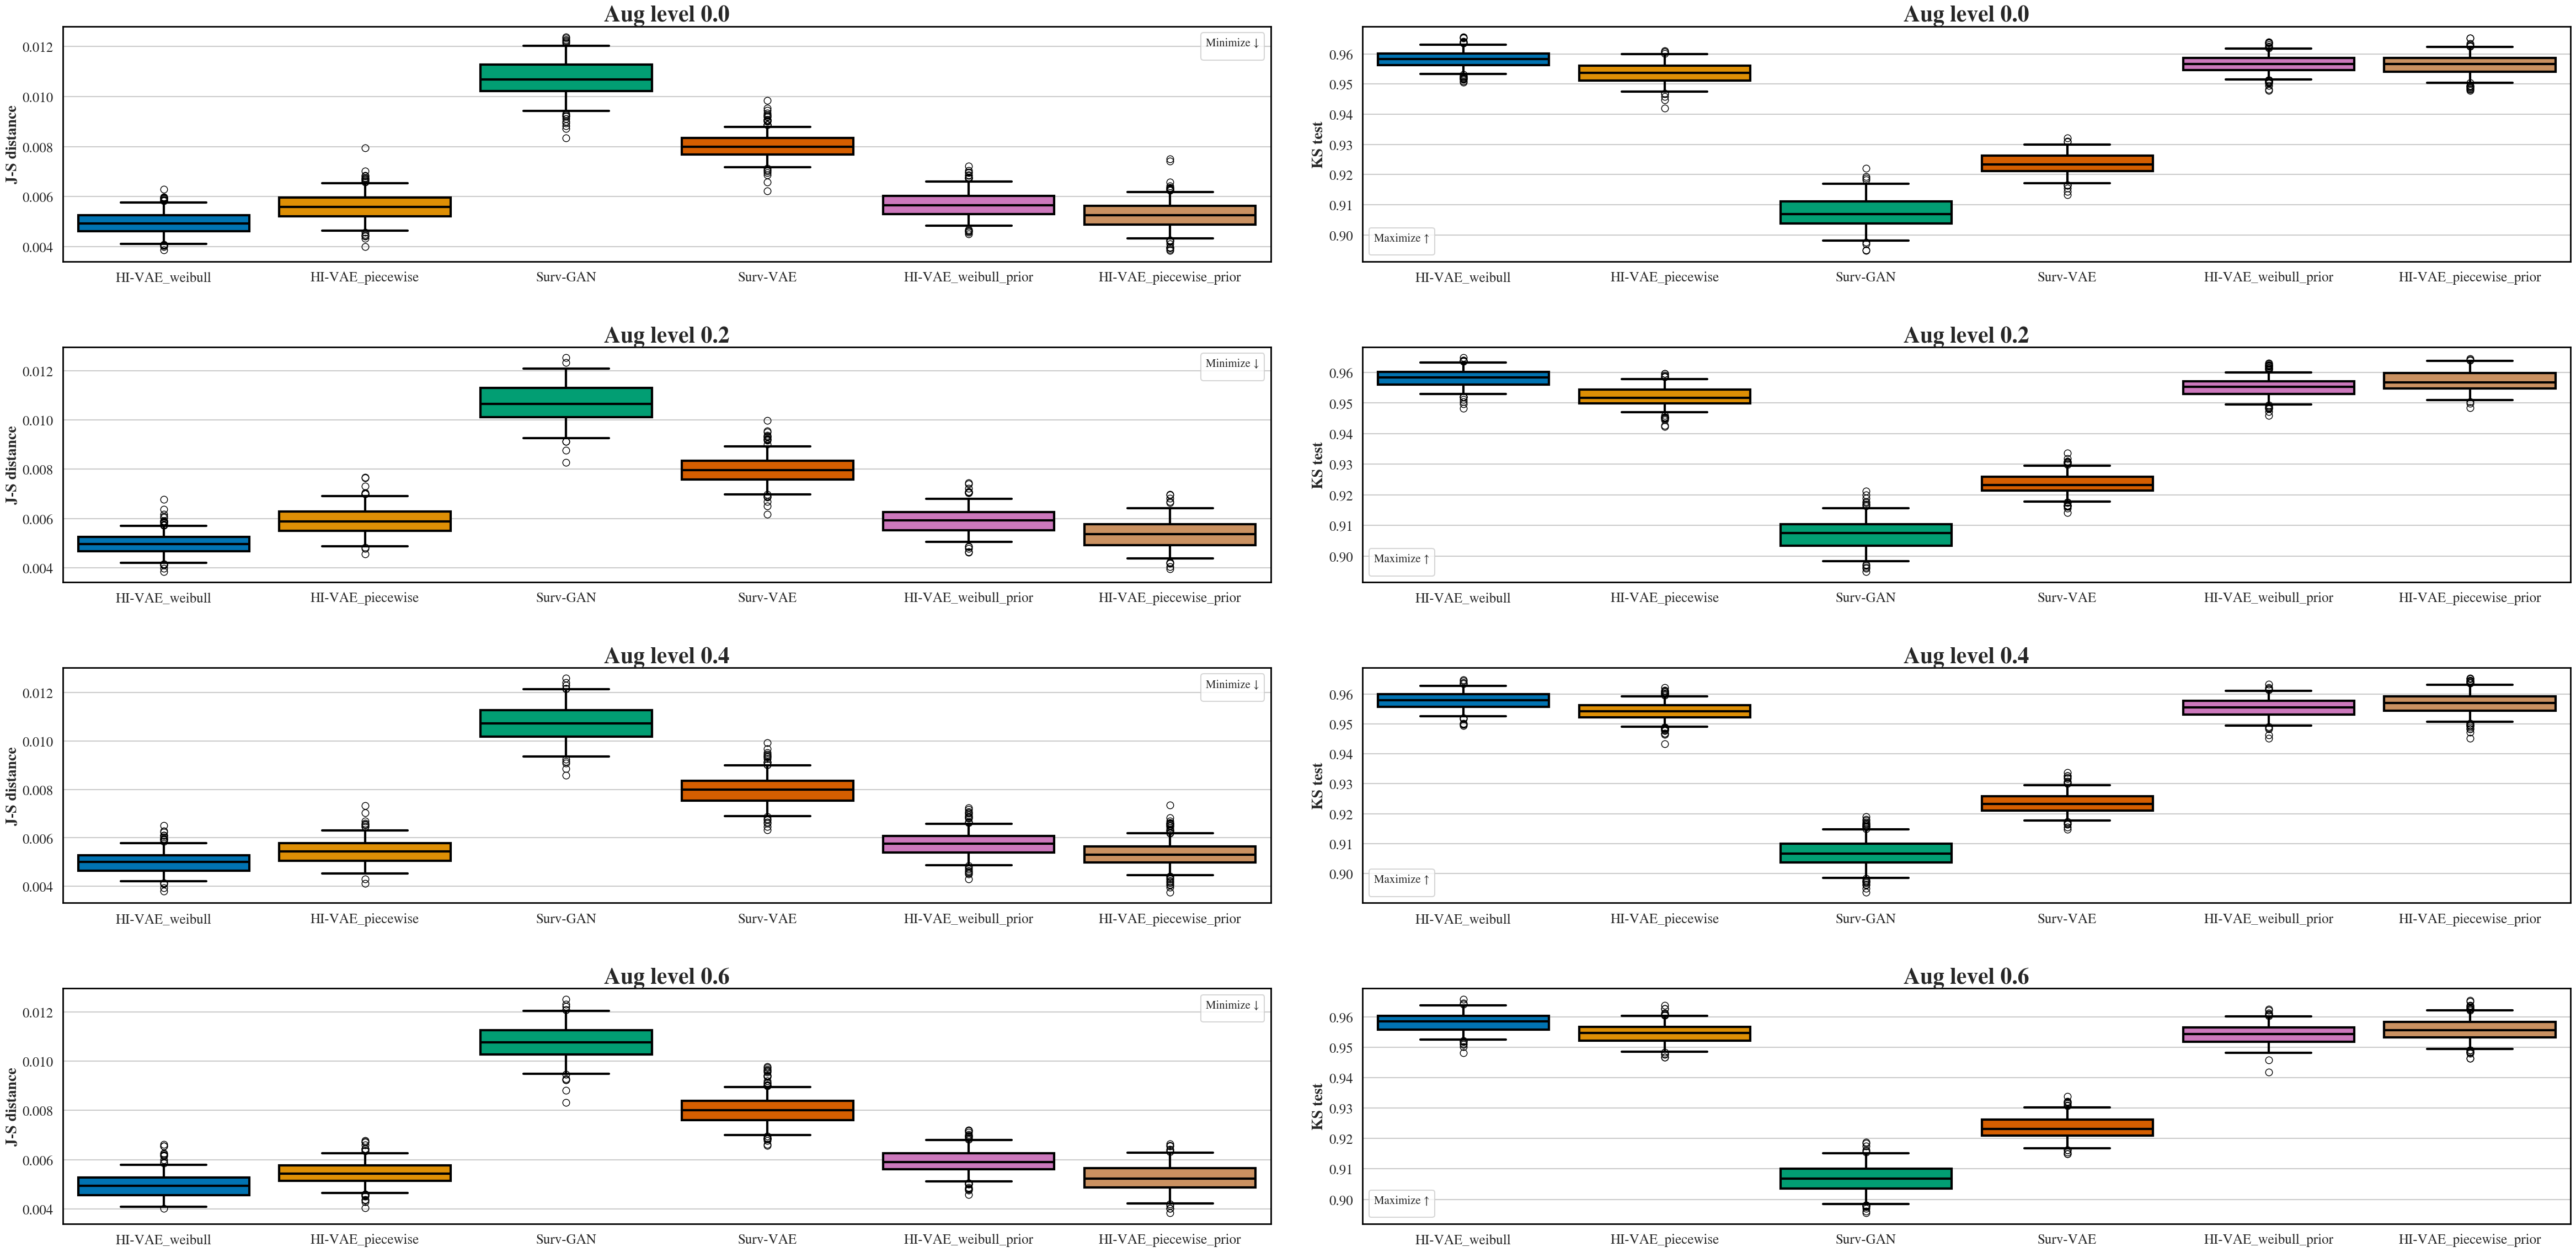

In [4]:
visualize("Aids", generators_sel, metrics=[['J-S distance', "min"], ['KS test', "max"]])

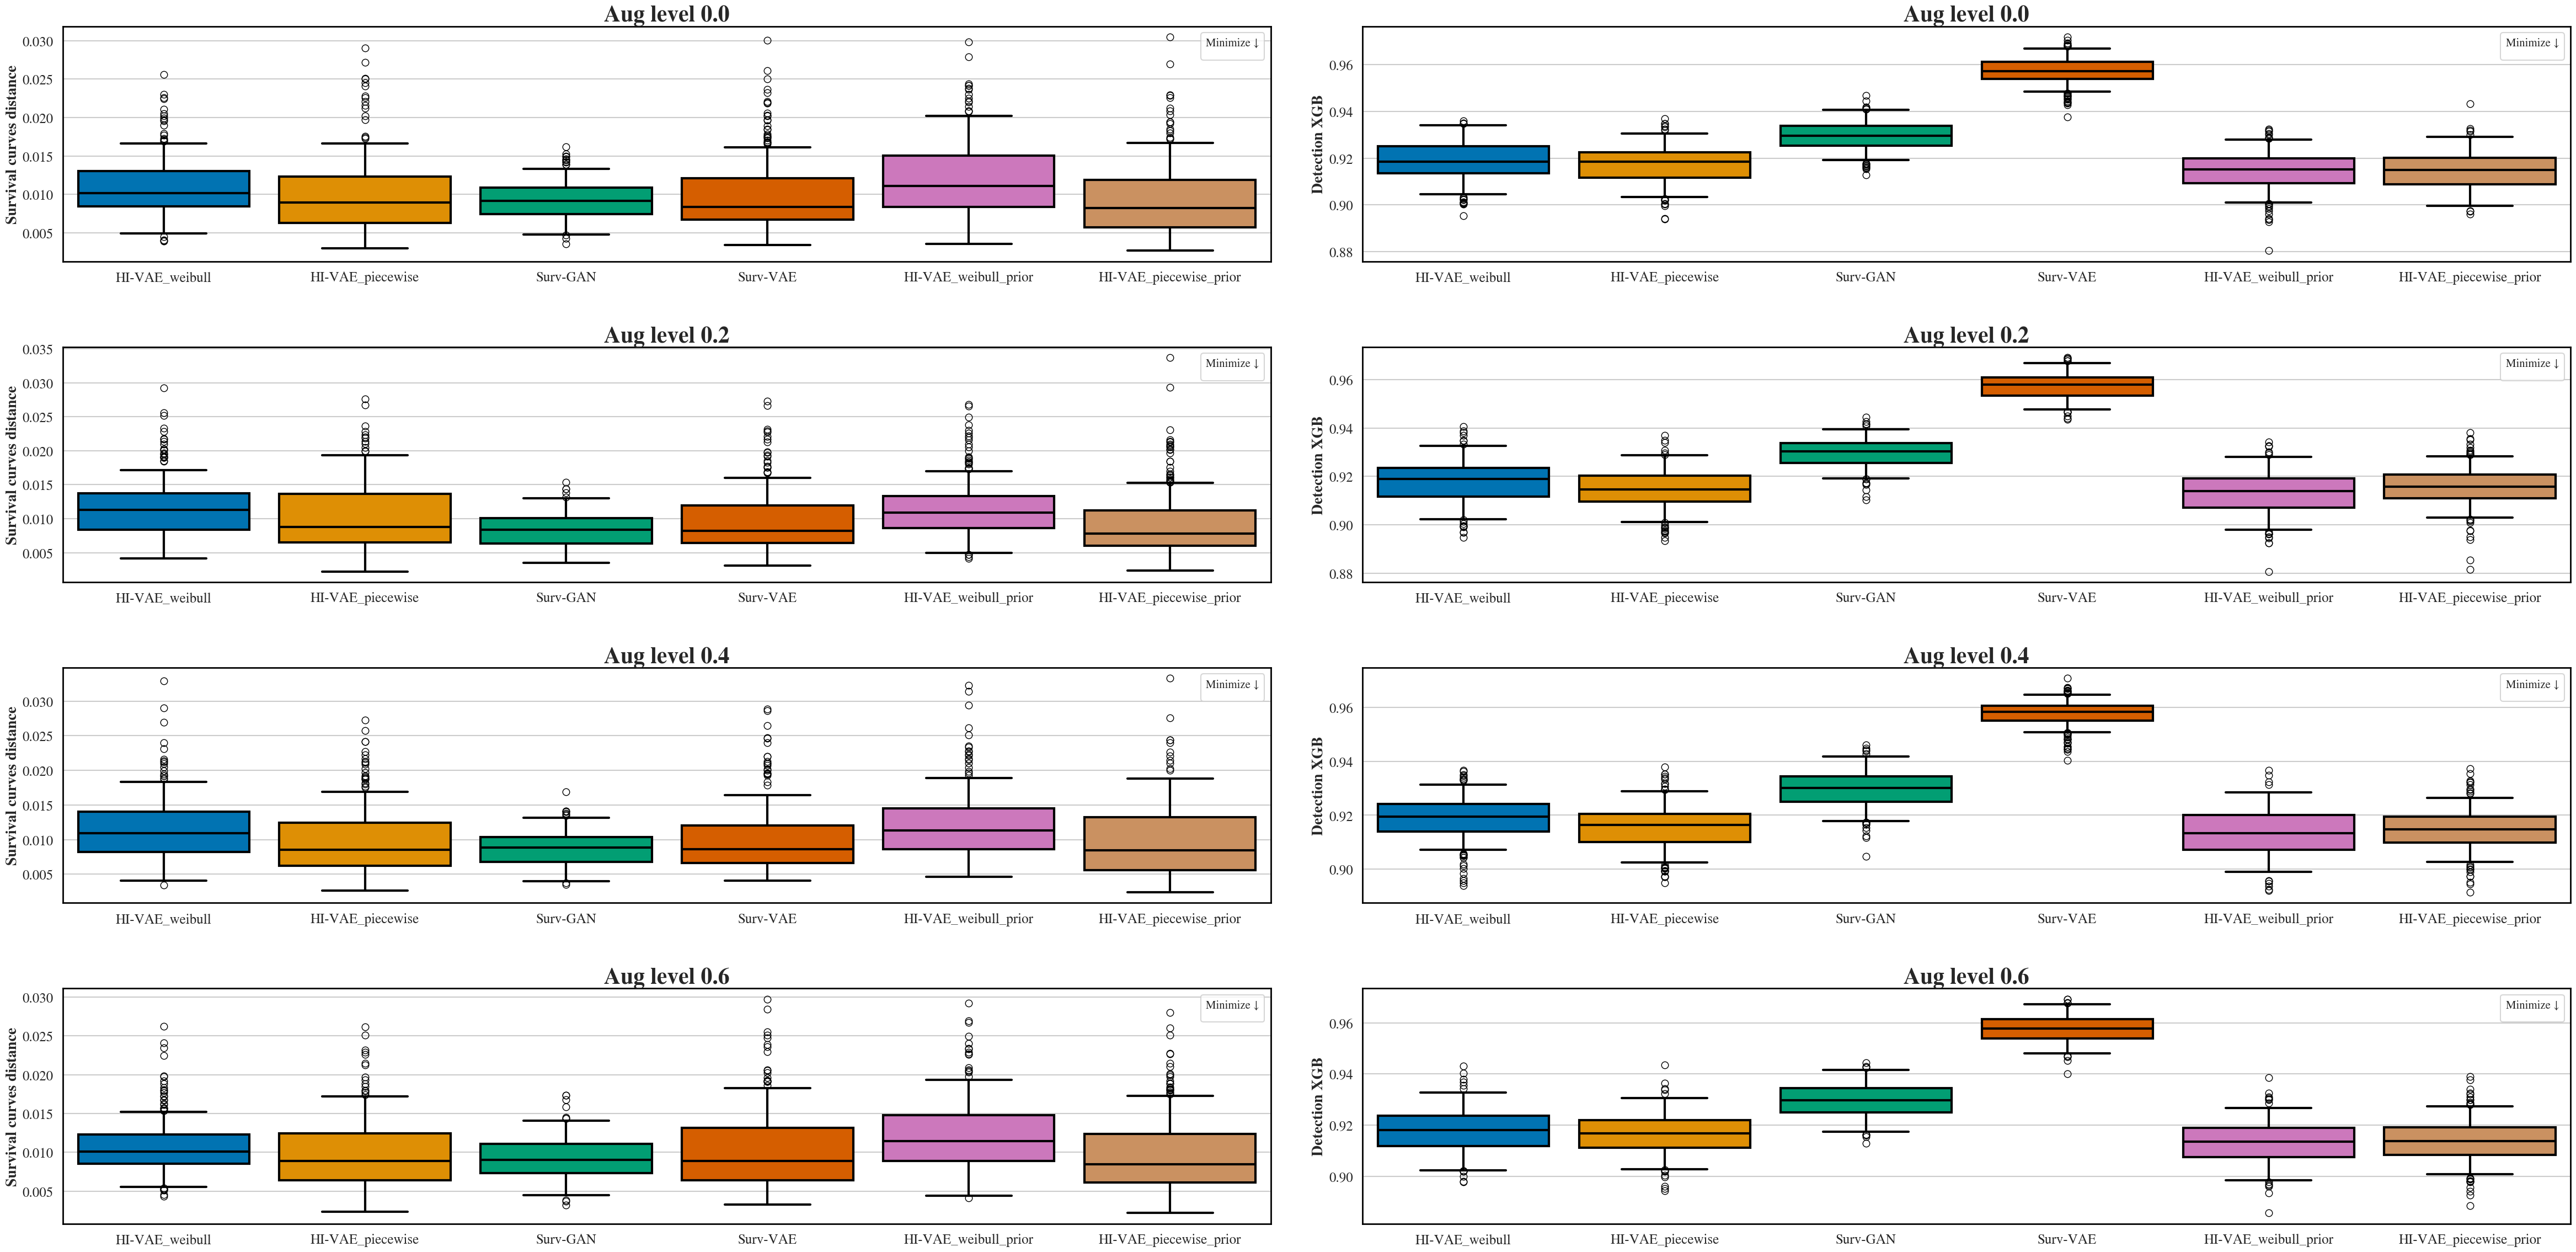

In [5]:
visualize("Aids", generators_sel, metrics=[['Survival curves distance', "min"], ['Detection XGB', "min"]])

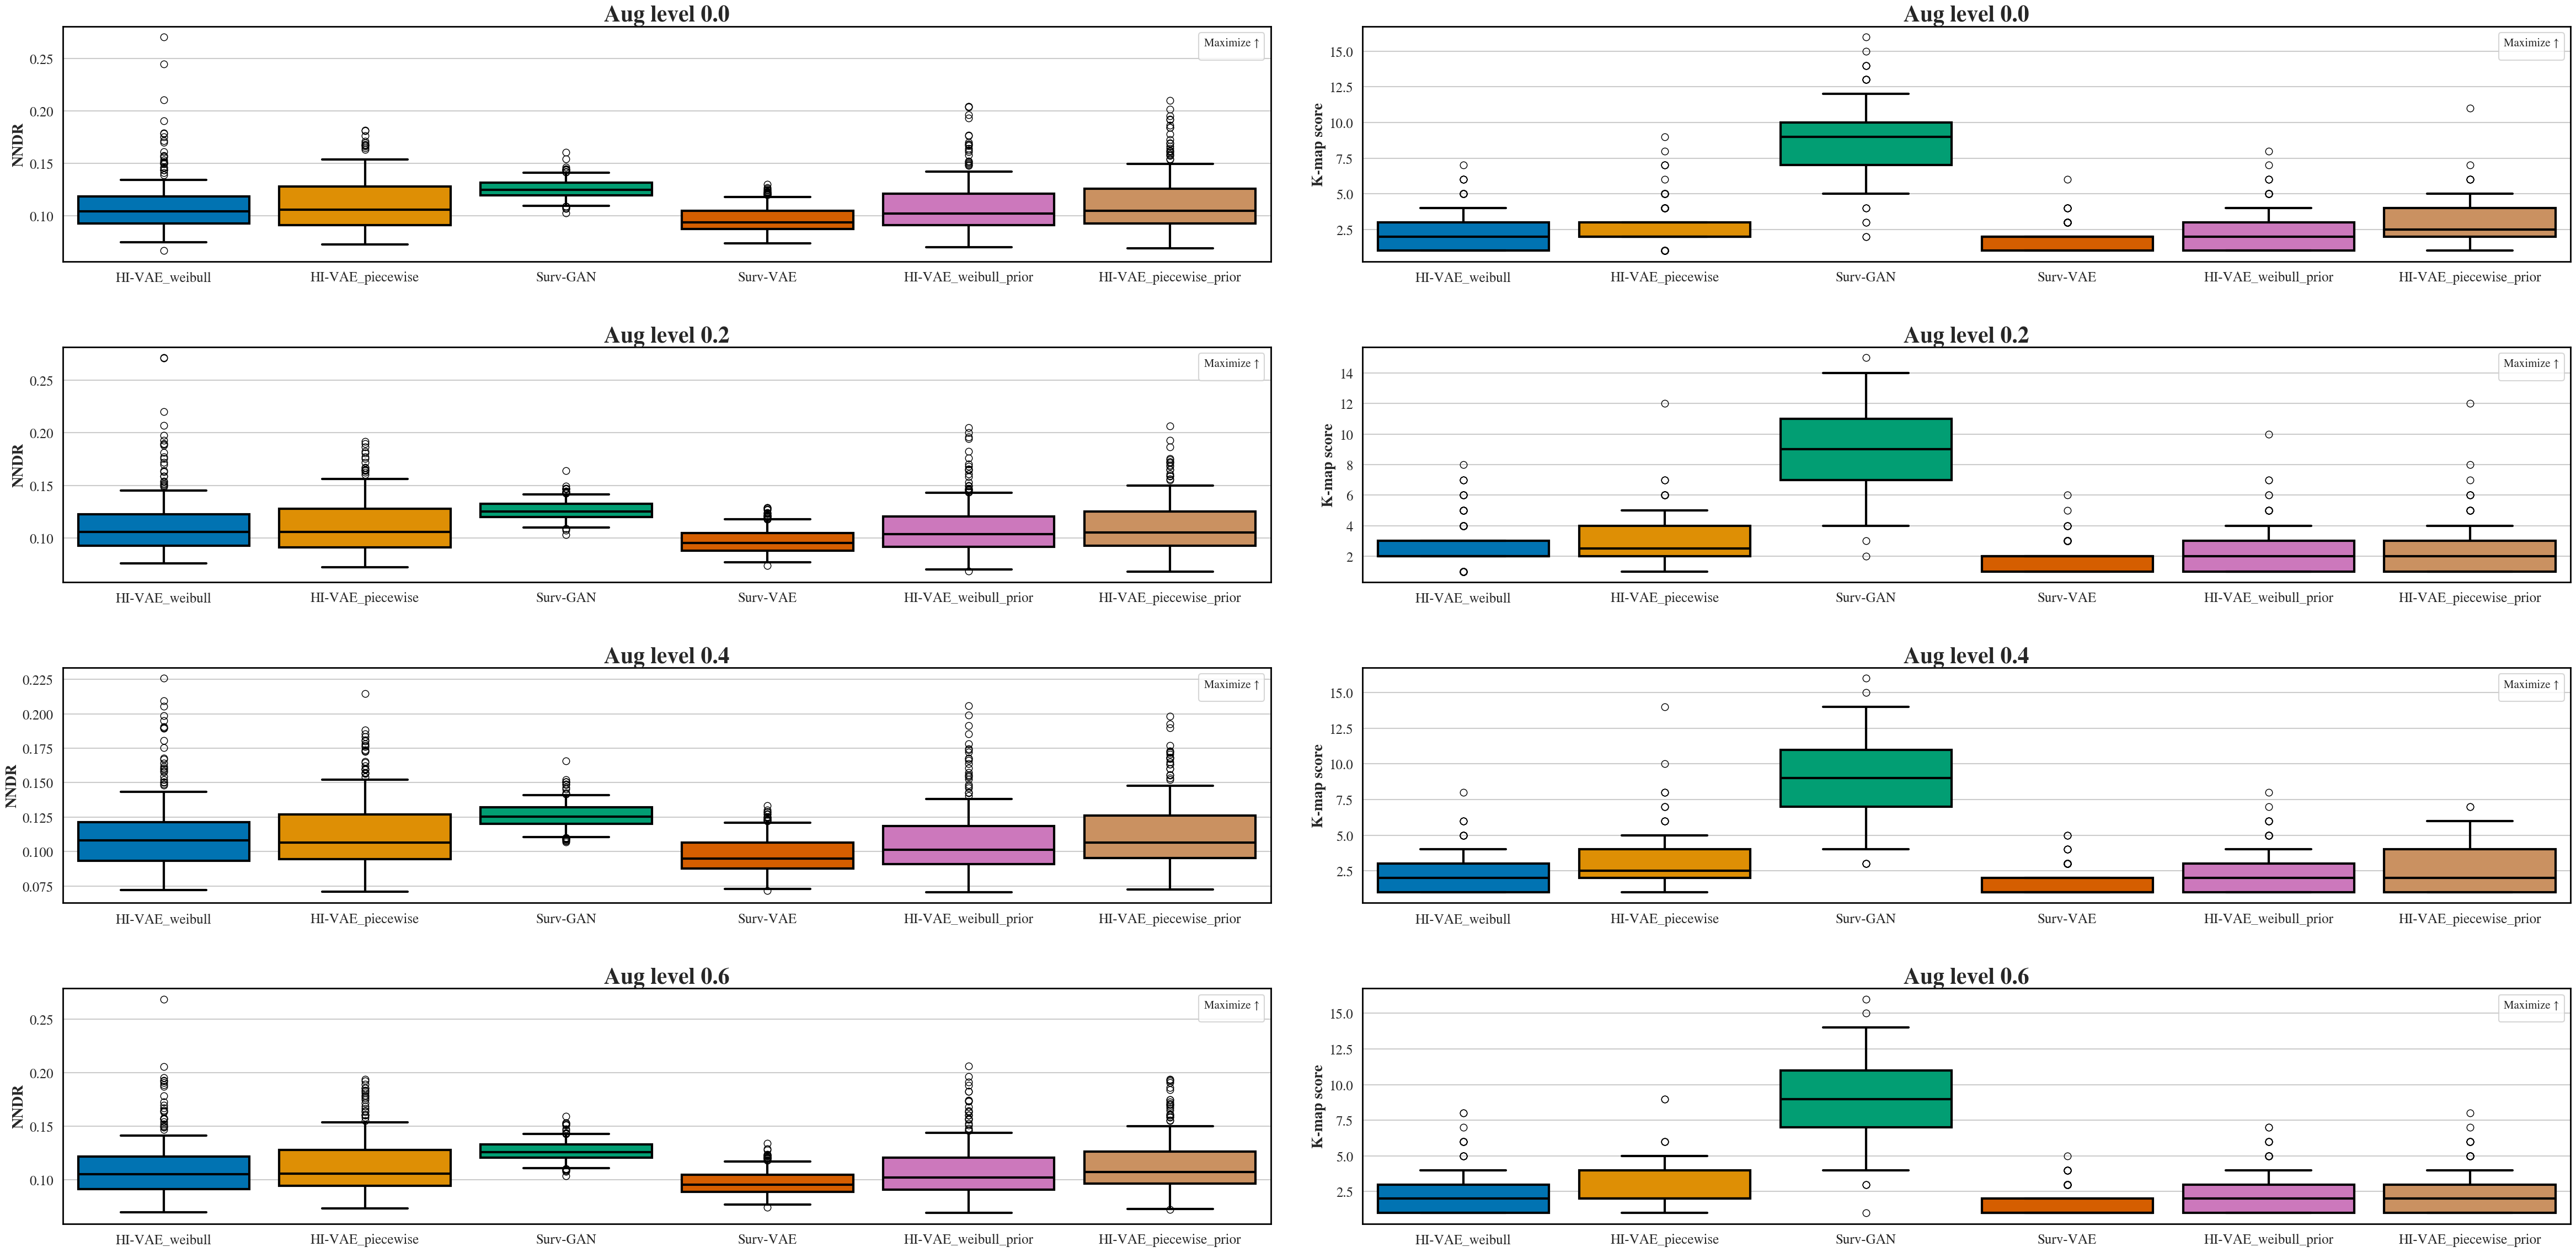

In [6]:
visualize("Aids", generators_sel, metrics=[['NNDR', "max"], ['K-map score', "max"]])

# SAS_1

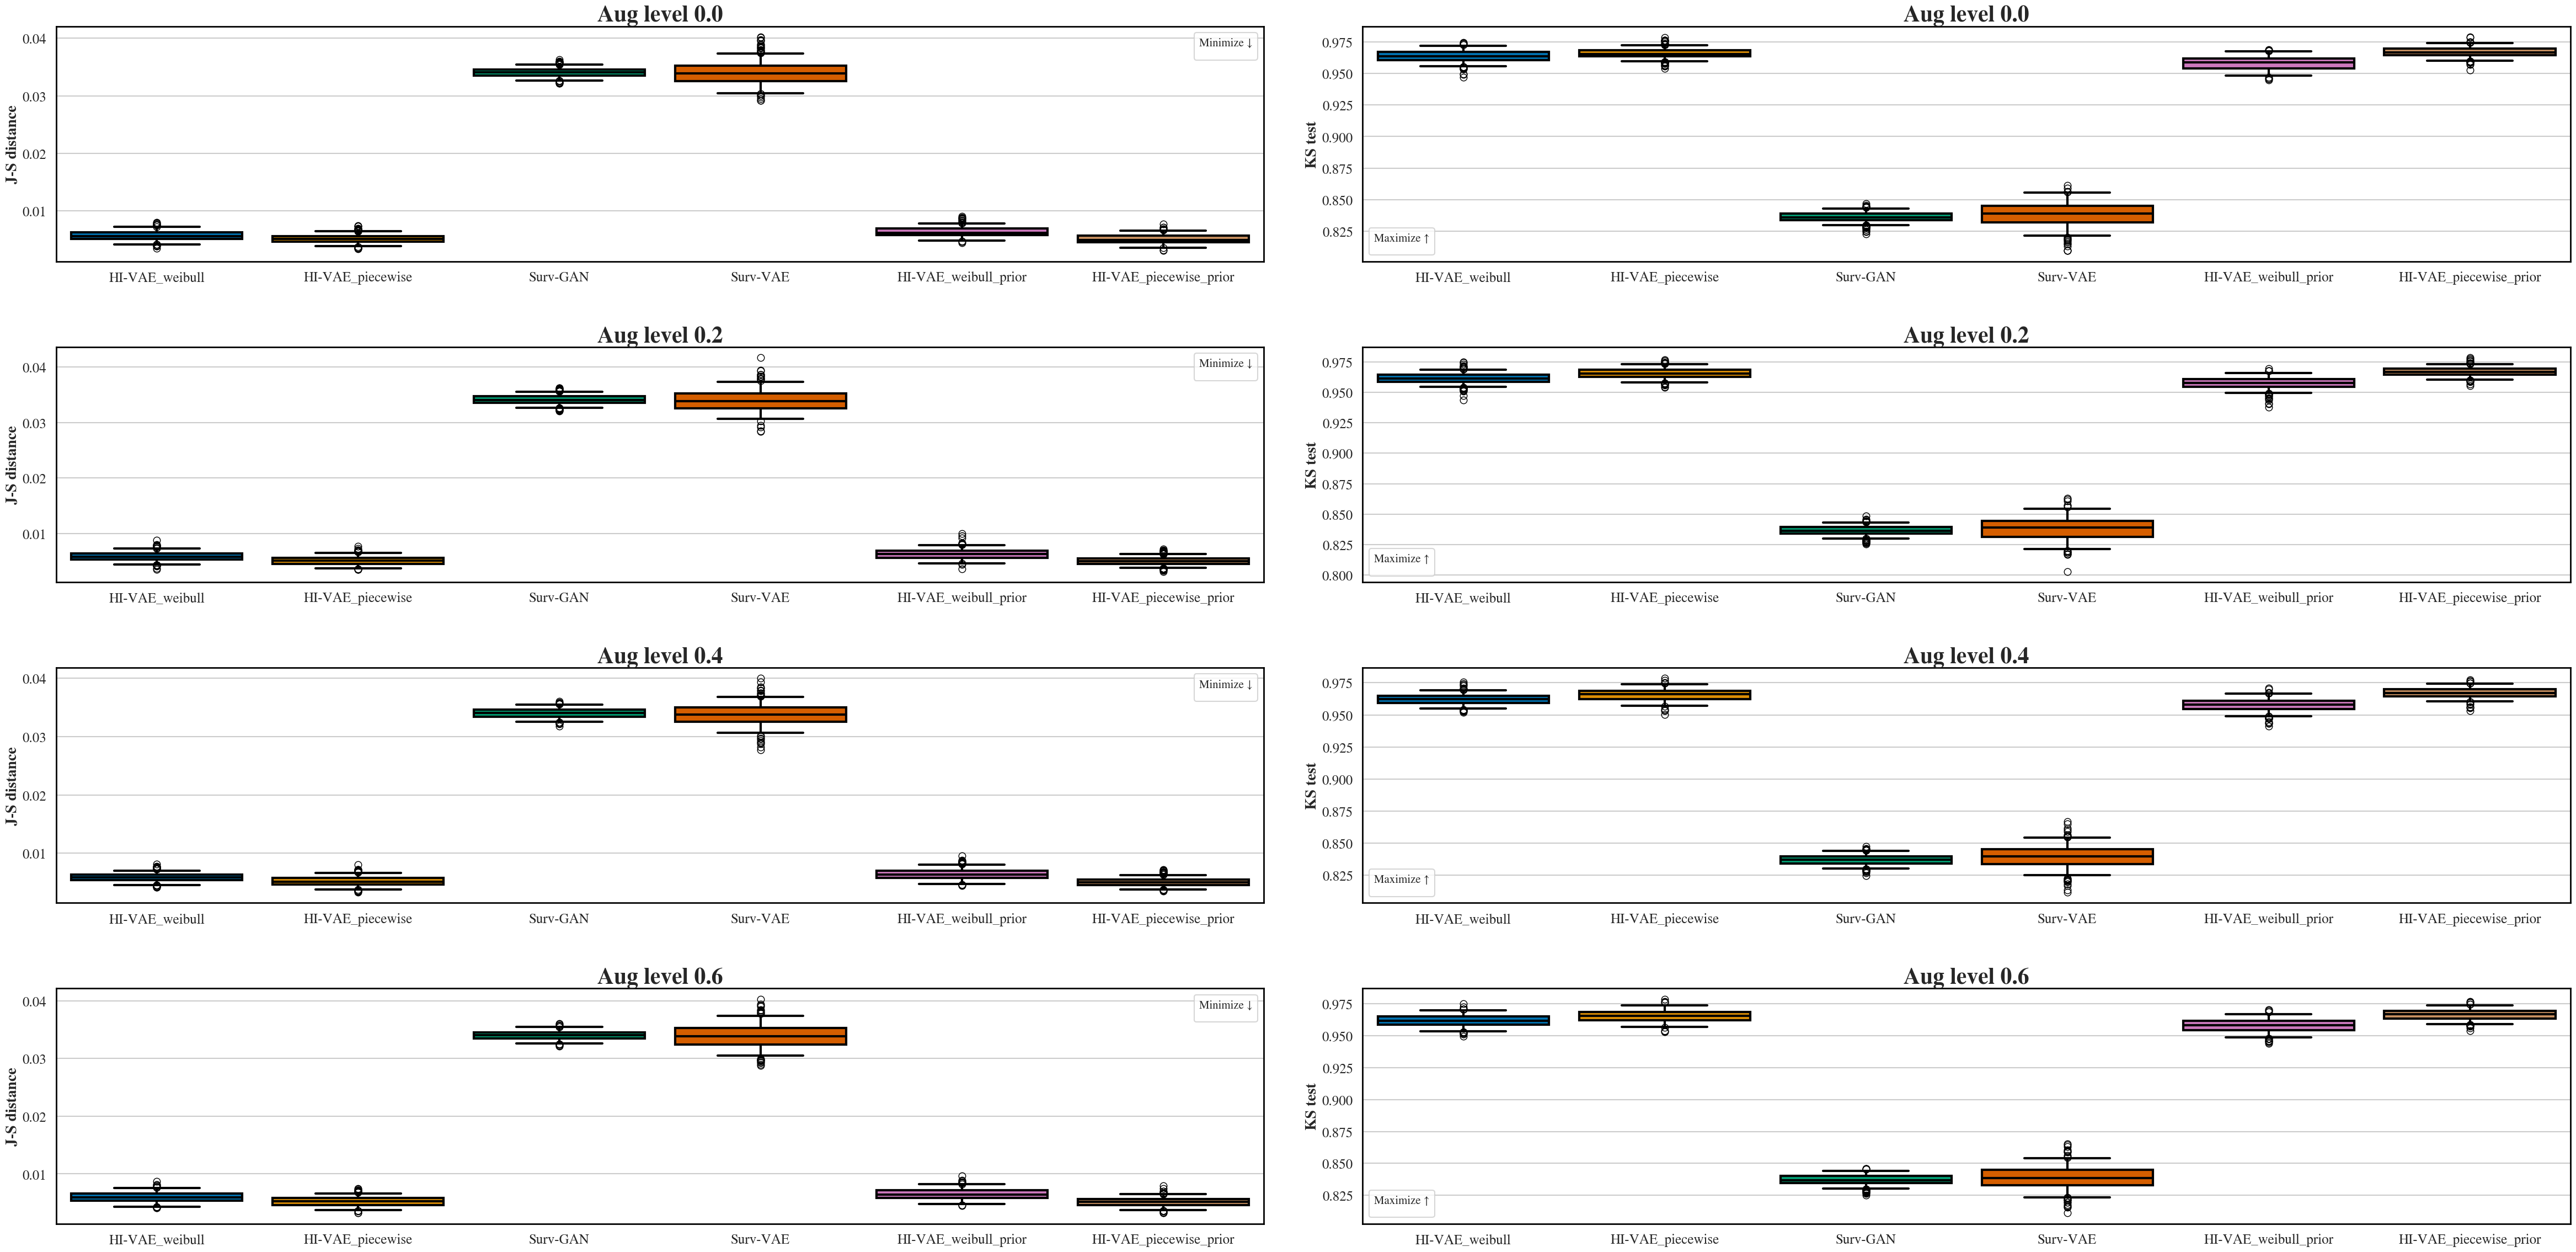

In [7]:
visualize("SAS_1", generators_sel, metrics=[['J-S distance', "min"], ['KS test', "max"]])

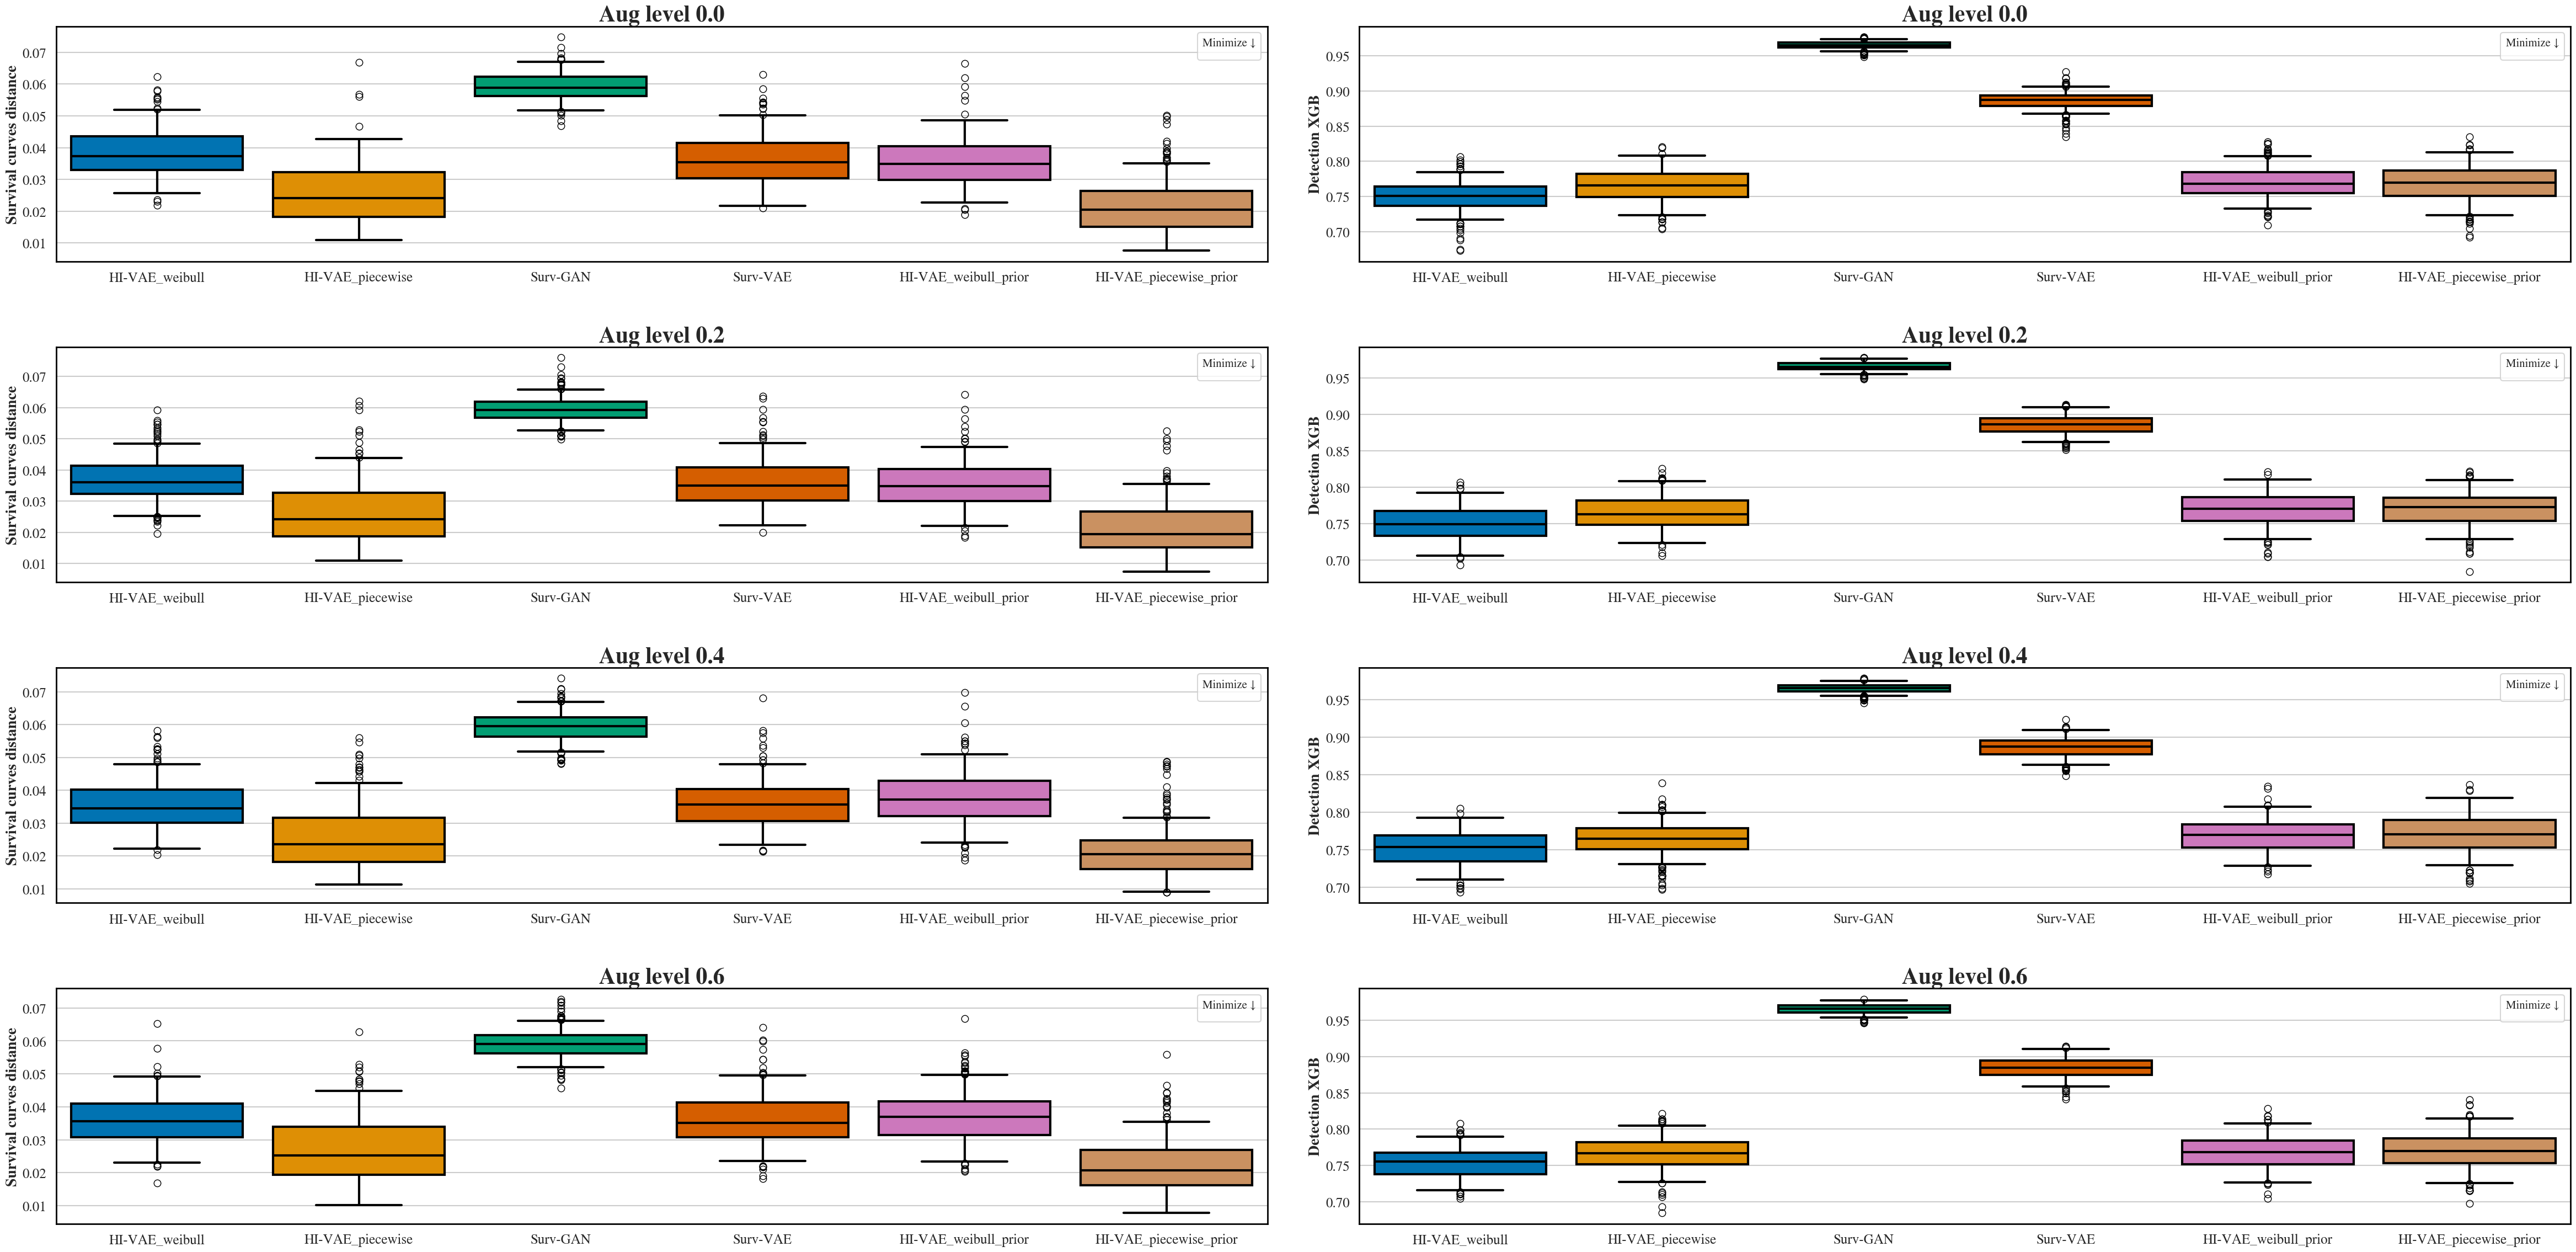

In [8]:
visualize("SAS_1", generators_sel, metrics=[['Survival curves distance', "min"], ['Detection XGB', "min"]])

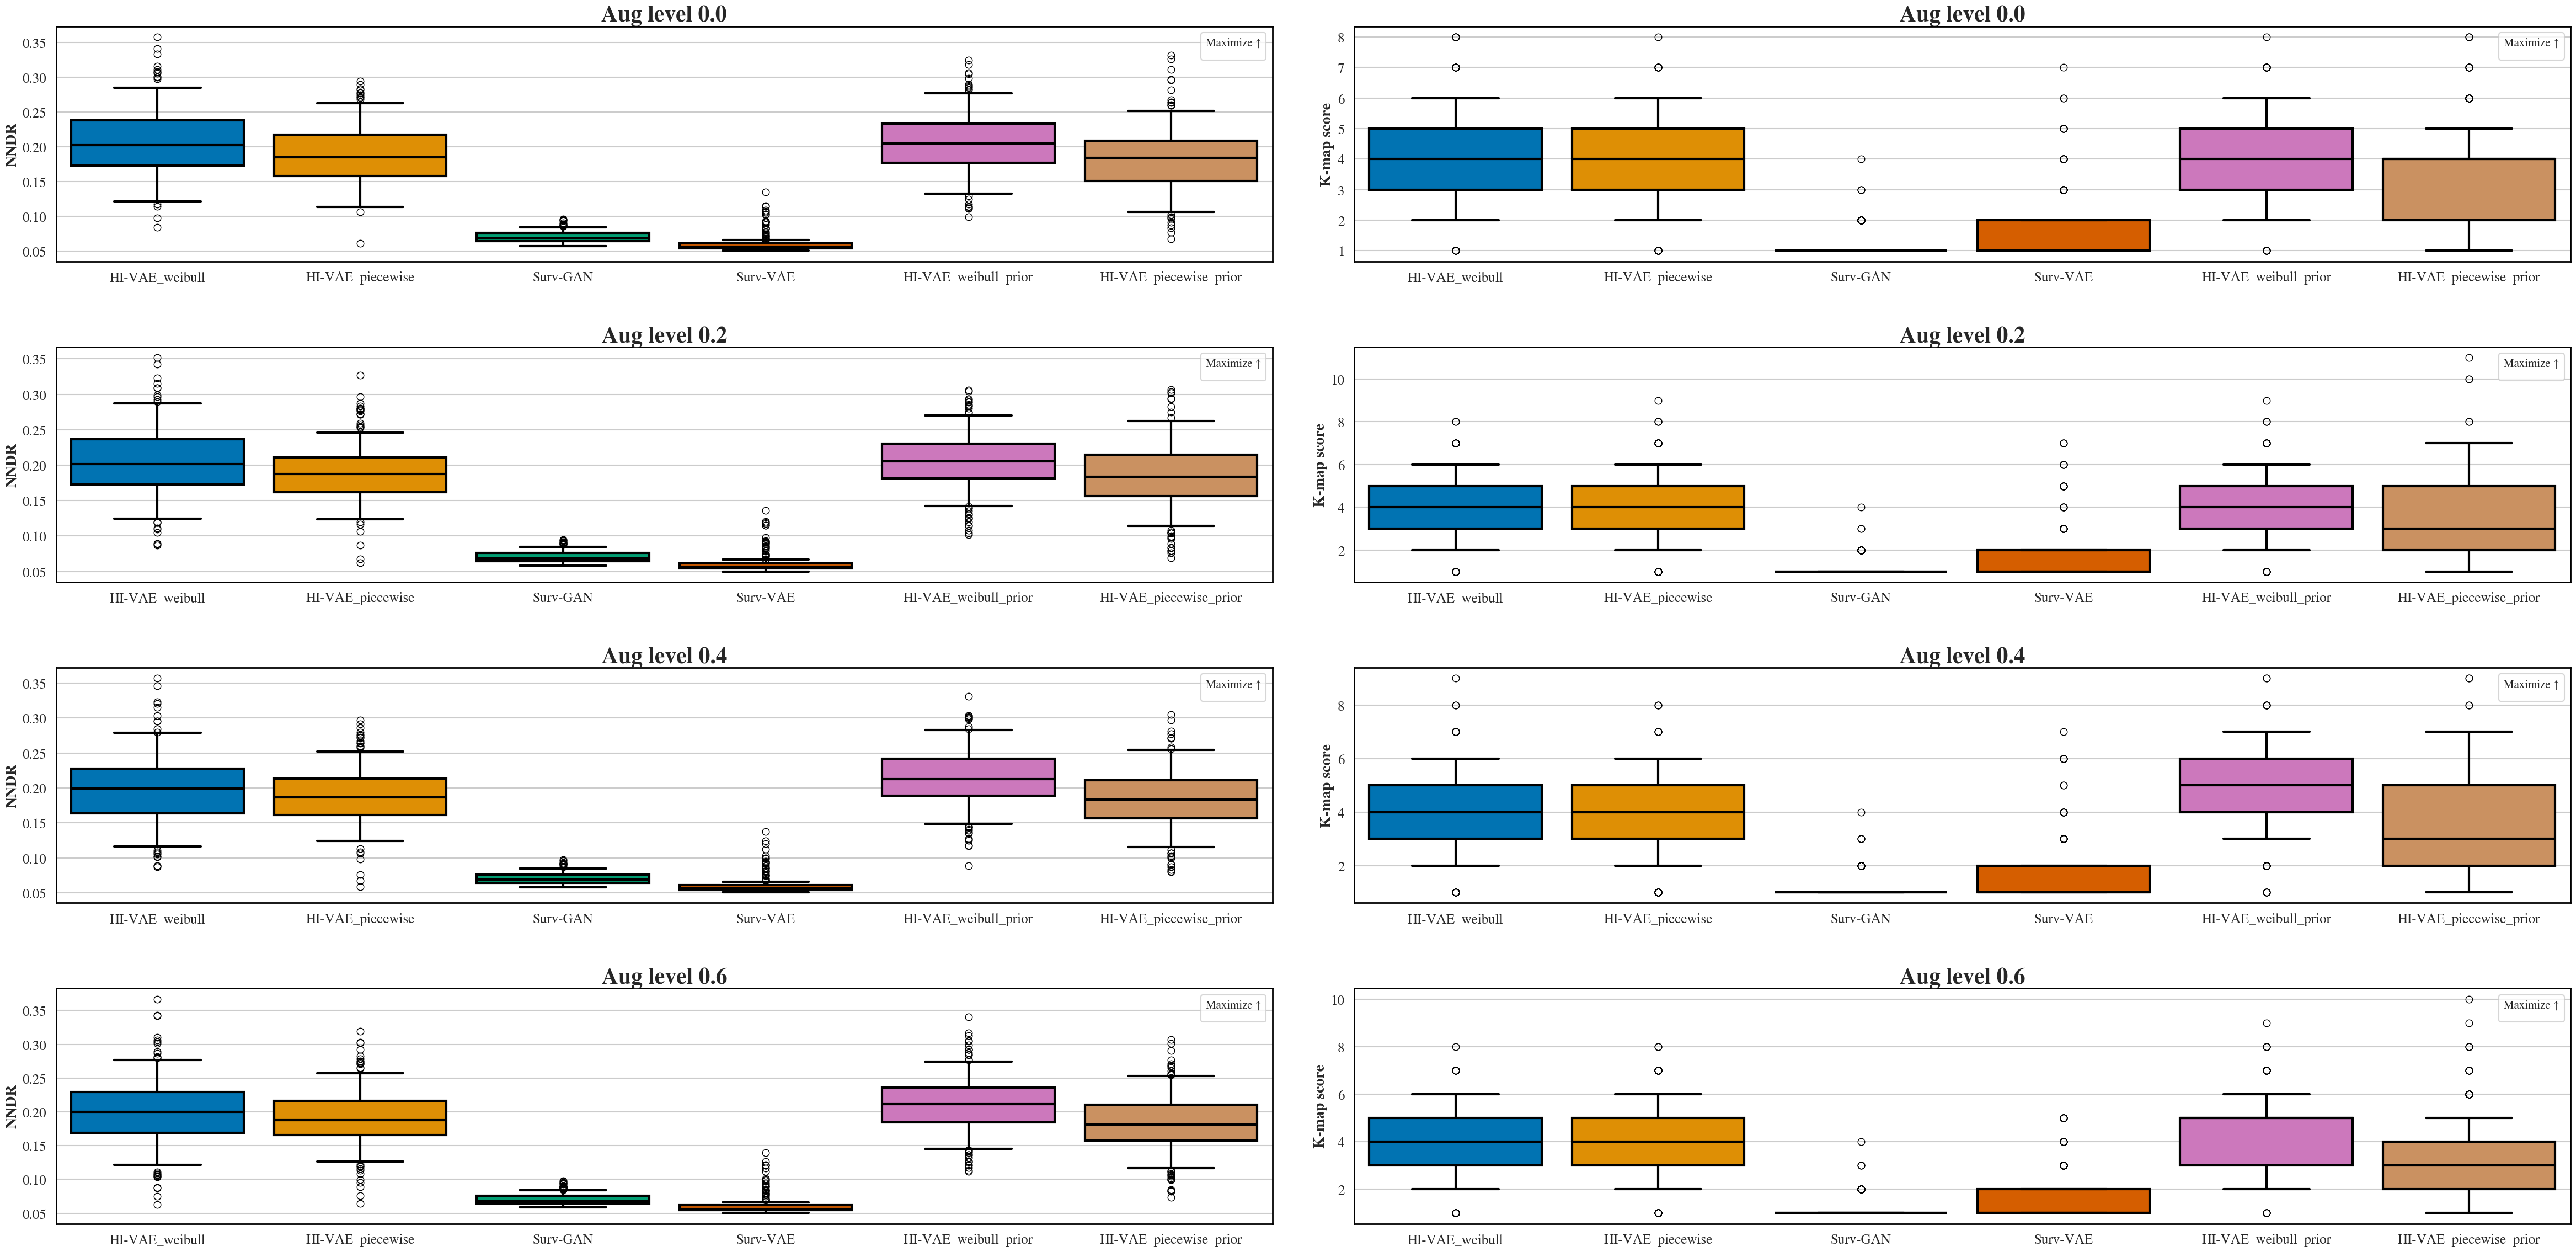

In [9]:
visualize("SAS_1", generators_sel, metrics=[['NNDR', "max"], ['K-map score', "max"]])

# SAS_2

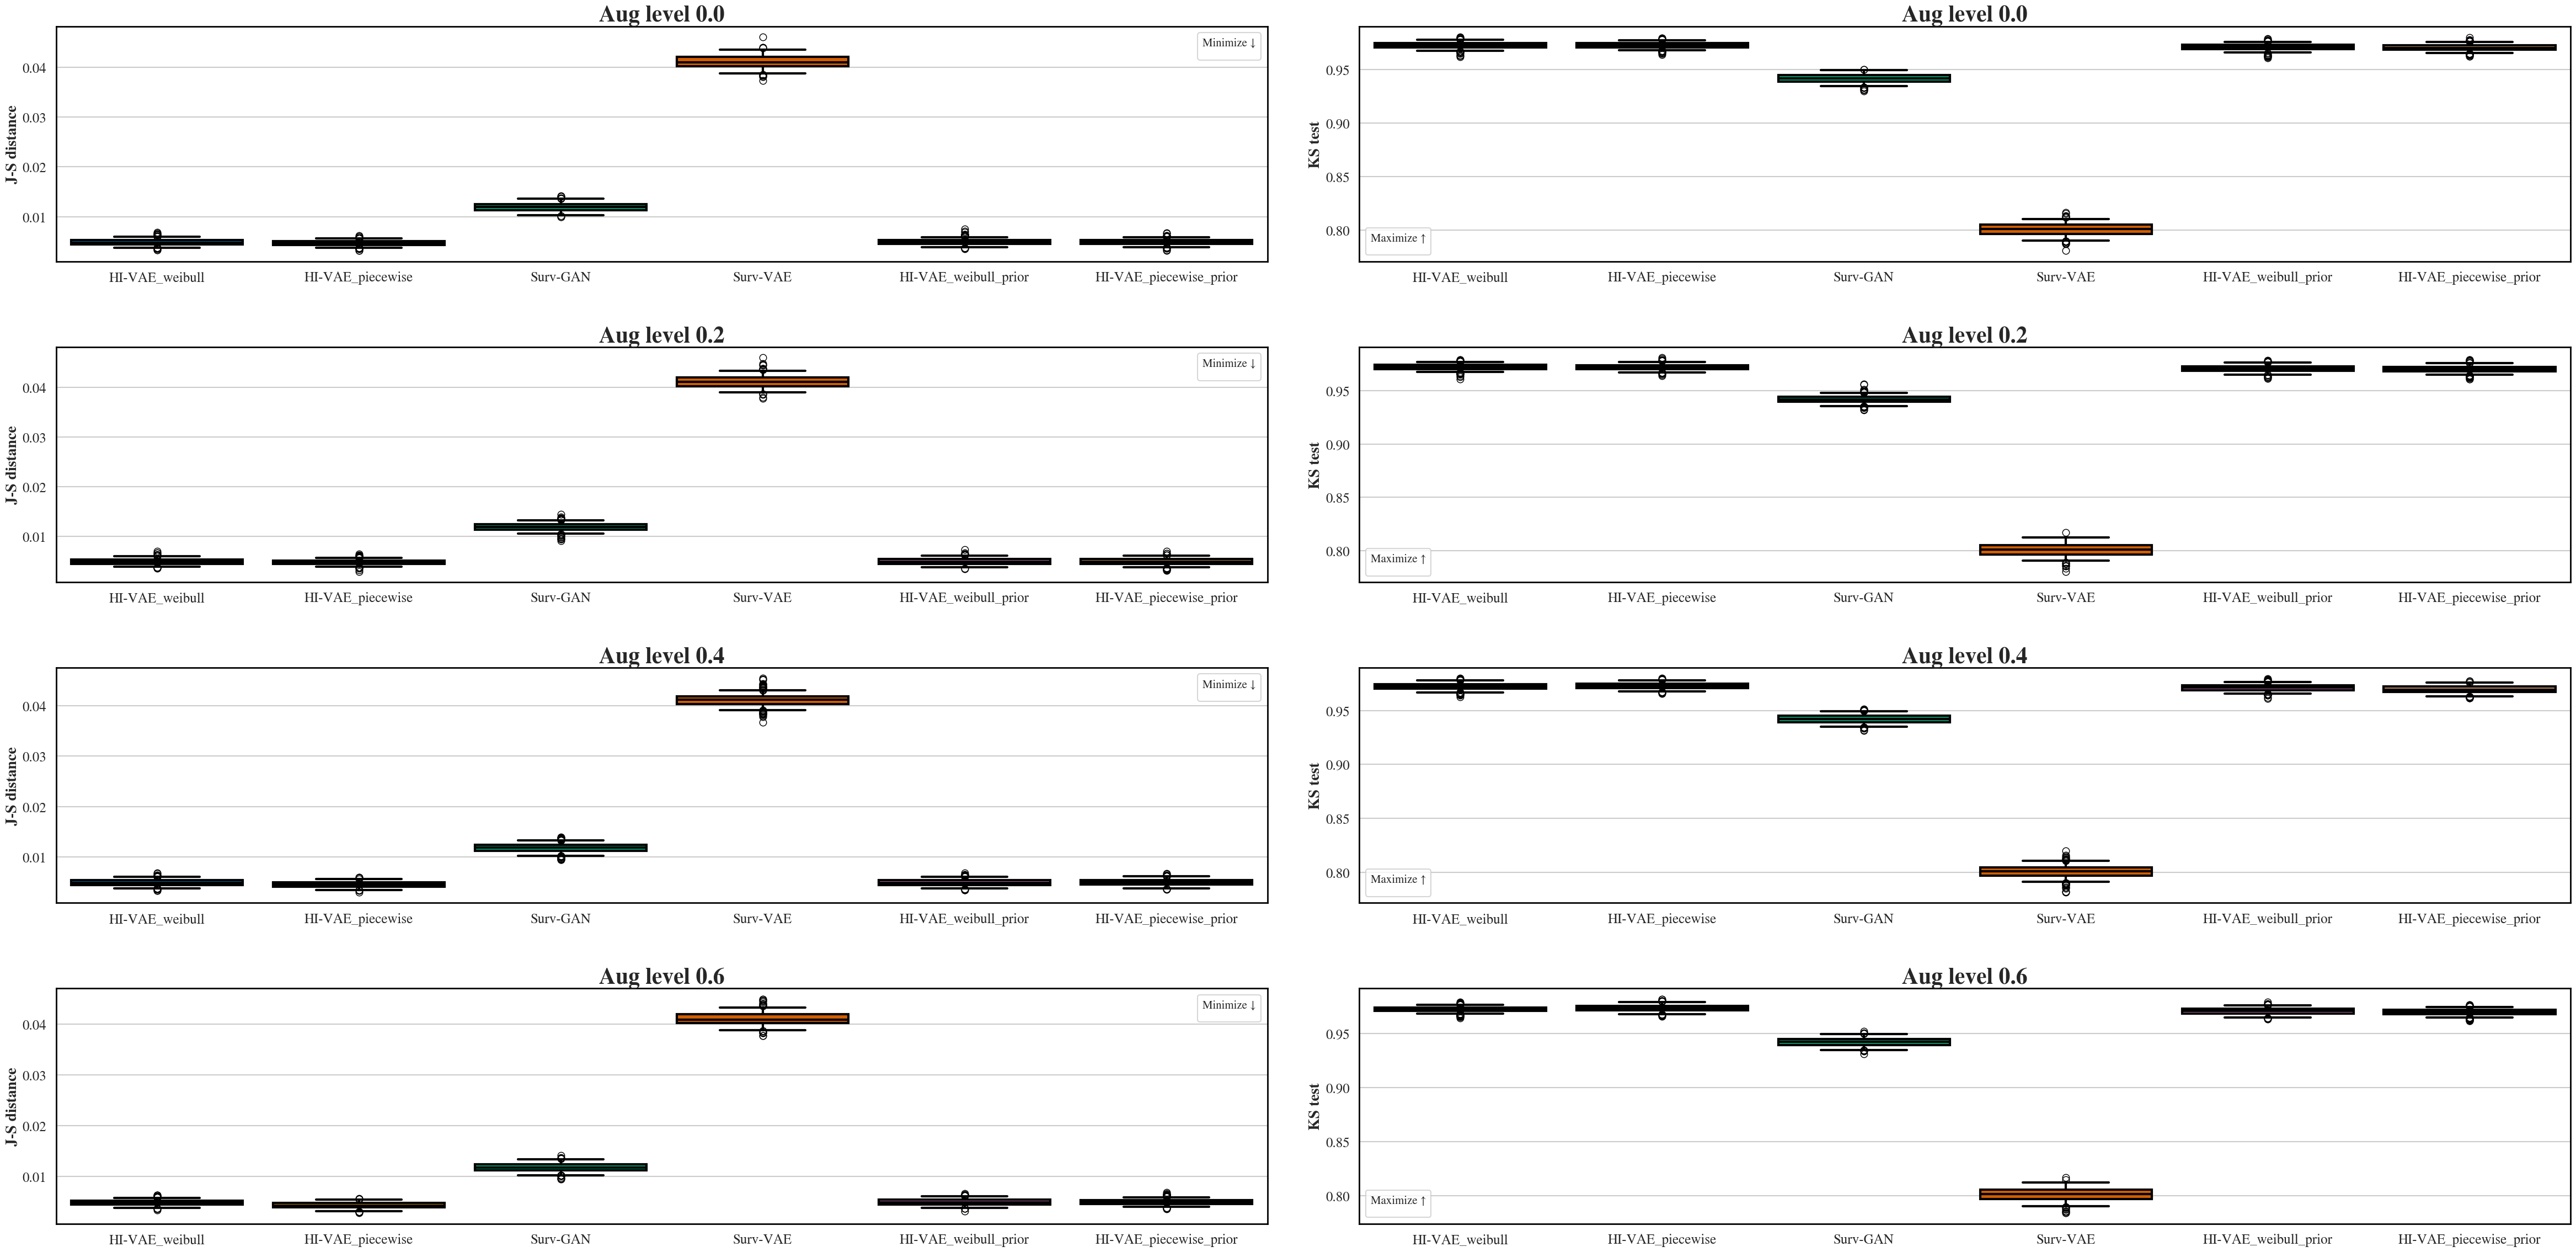

In [10]:
visualize("SAS_2", generators_sel, metrics=[['J-S distance', "min"], ['KS test', "max"]])

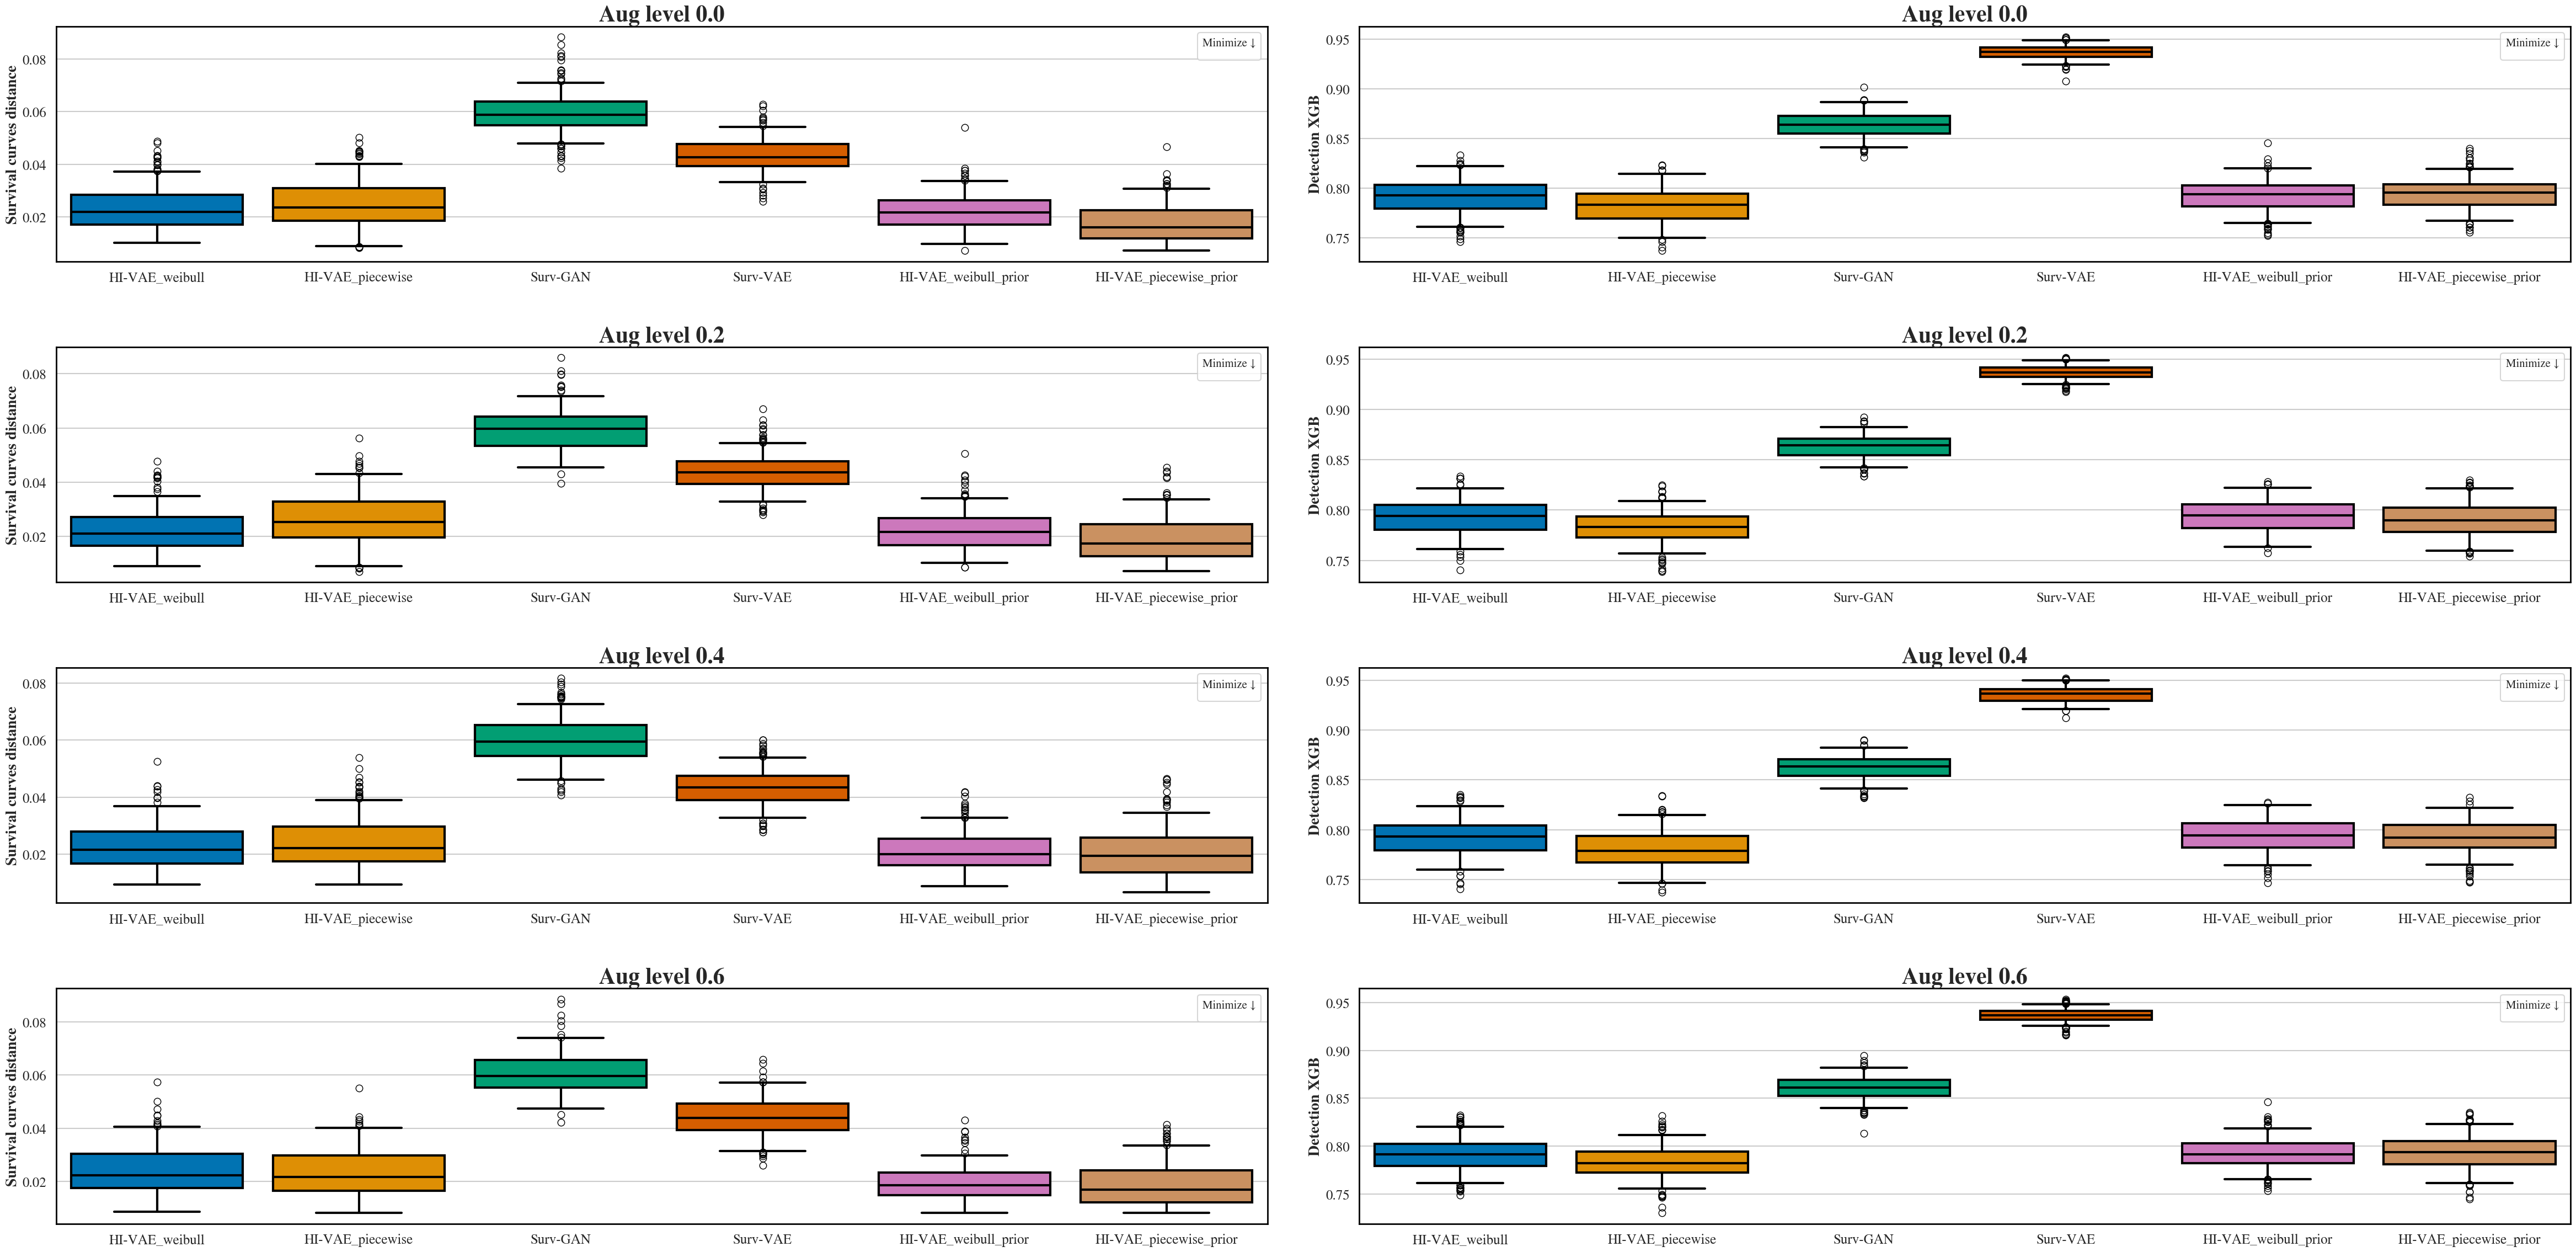

In [11]:
visualize("SAS_2", generators_sel, metrics=[['Survival curves distance', "min"], ['Detection XGB', "min"]])

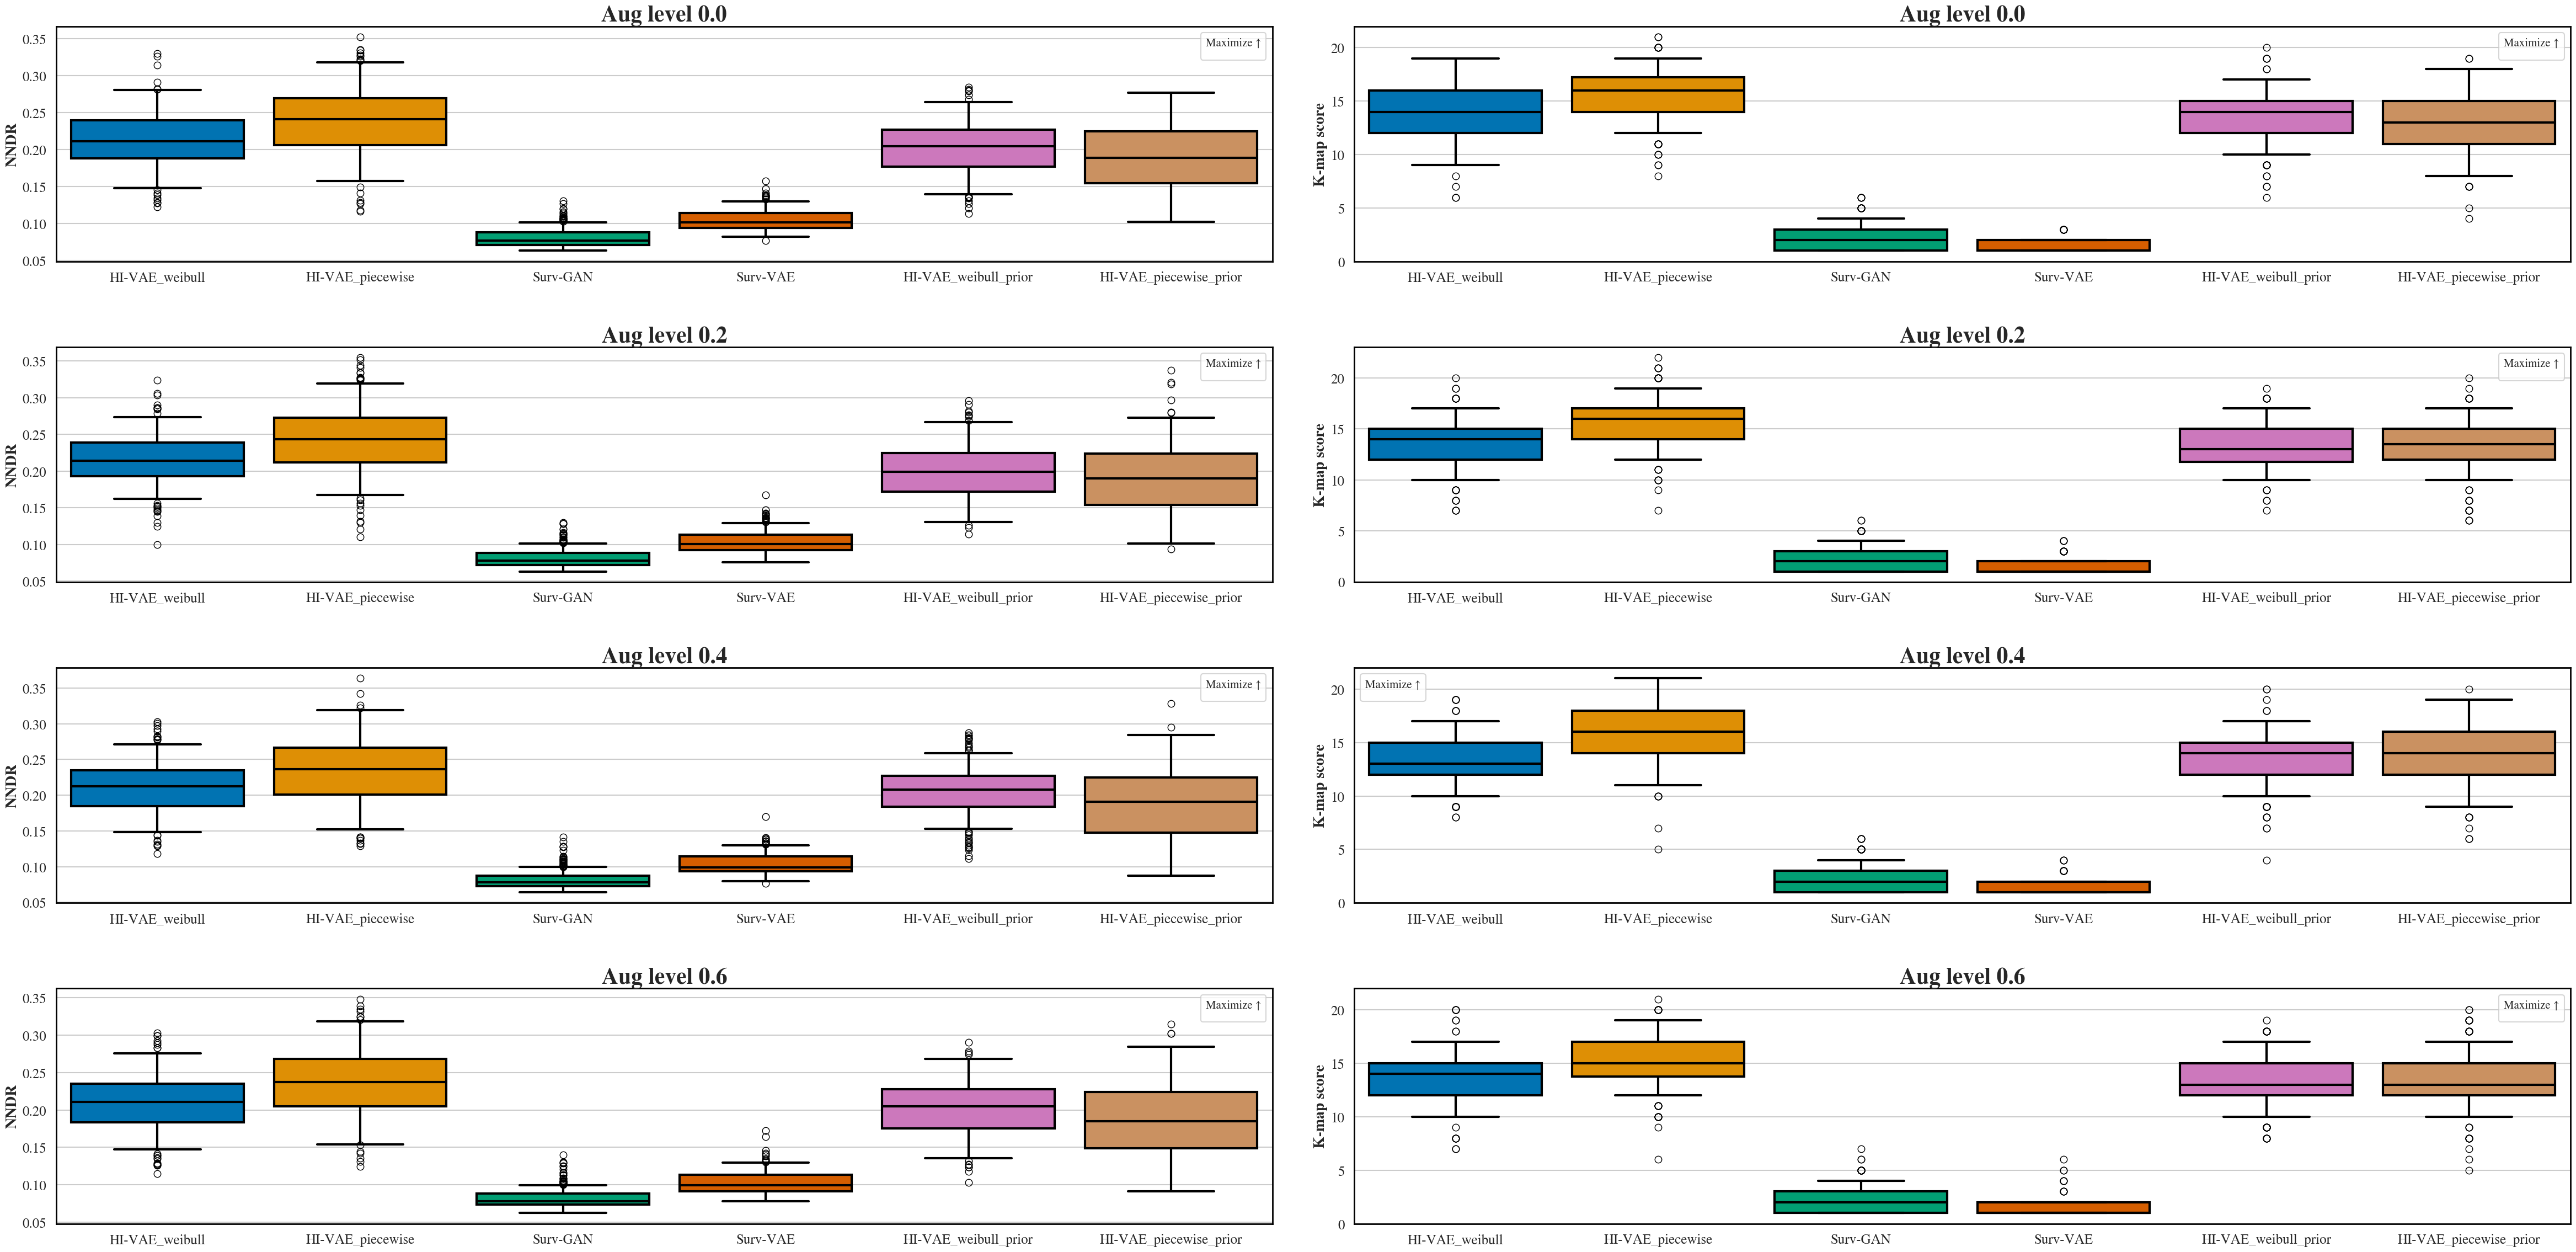

In [12]:
visualize("SAS_2", generators_sel, metrics=[['NNDR', "max"], ['K-map score', "max"]])

# SAS_3

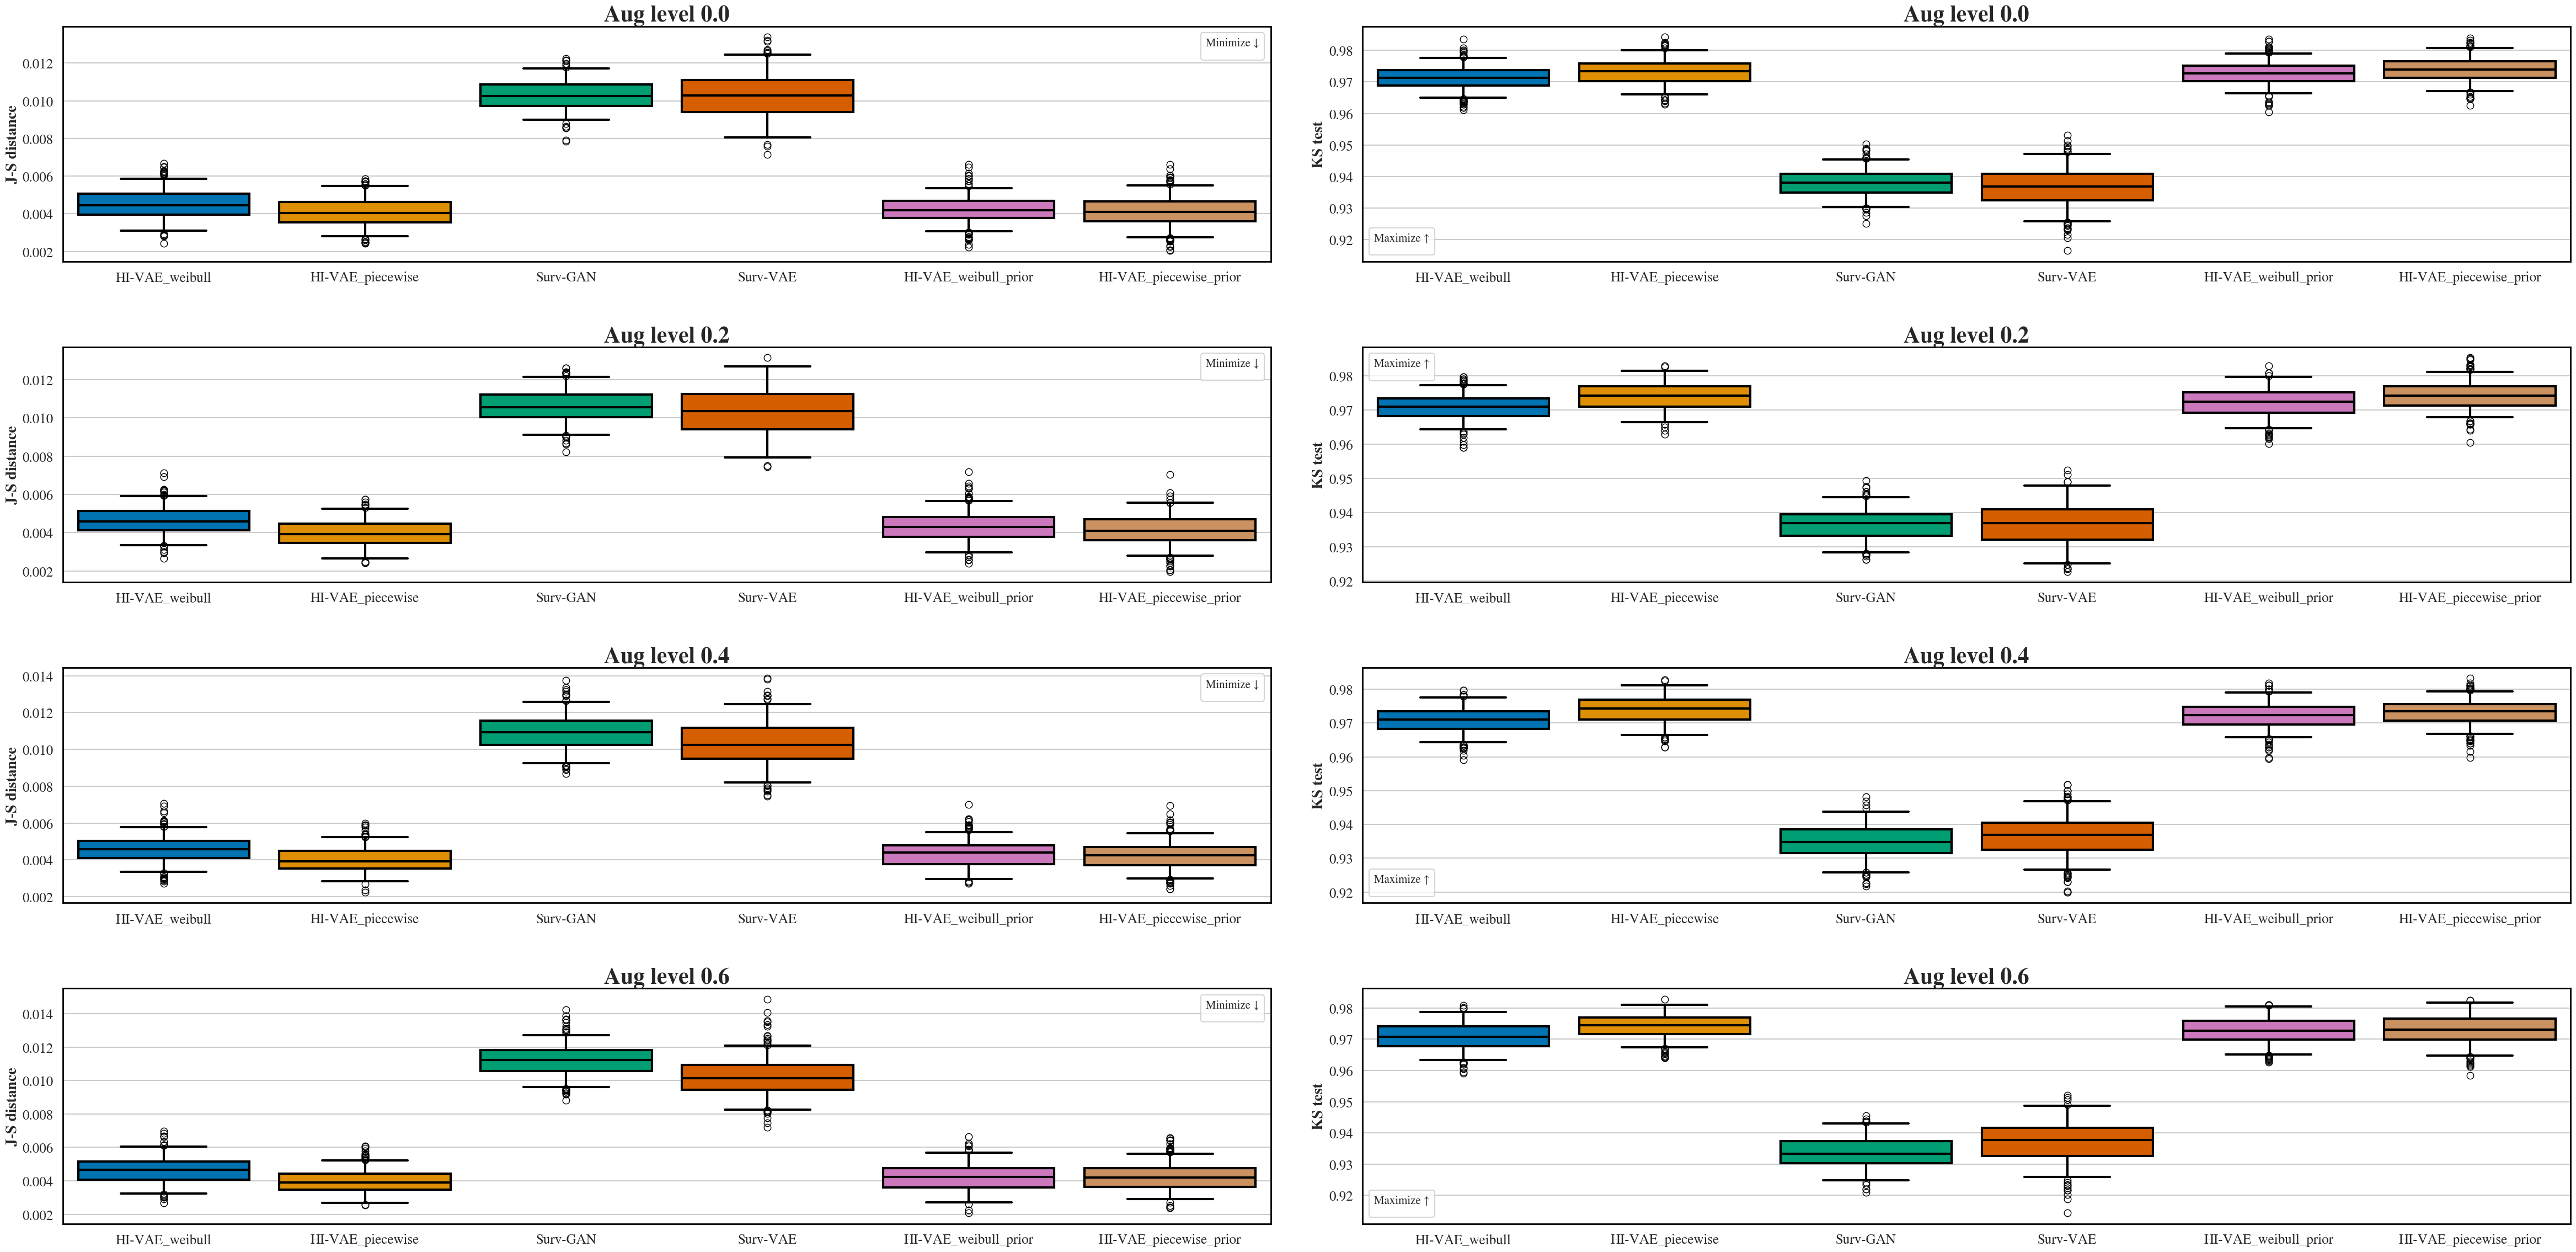

In [13]:
visualize("SAS_3", generators_sel, metrics=[['J-S distance', "min"], ['KS test', "max"]])

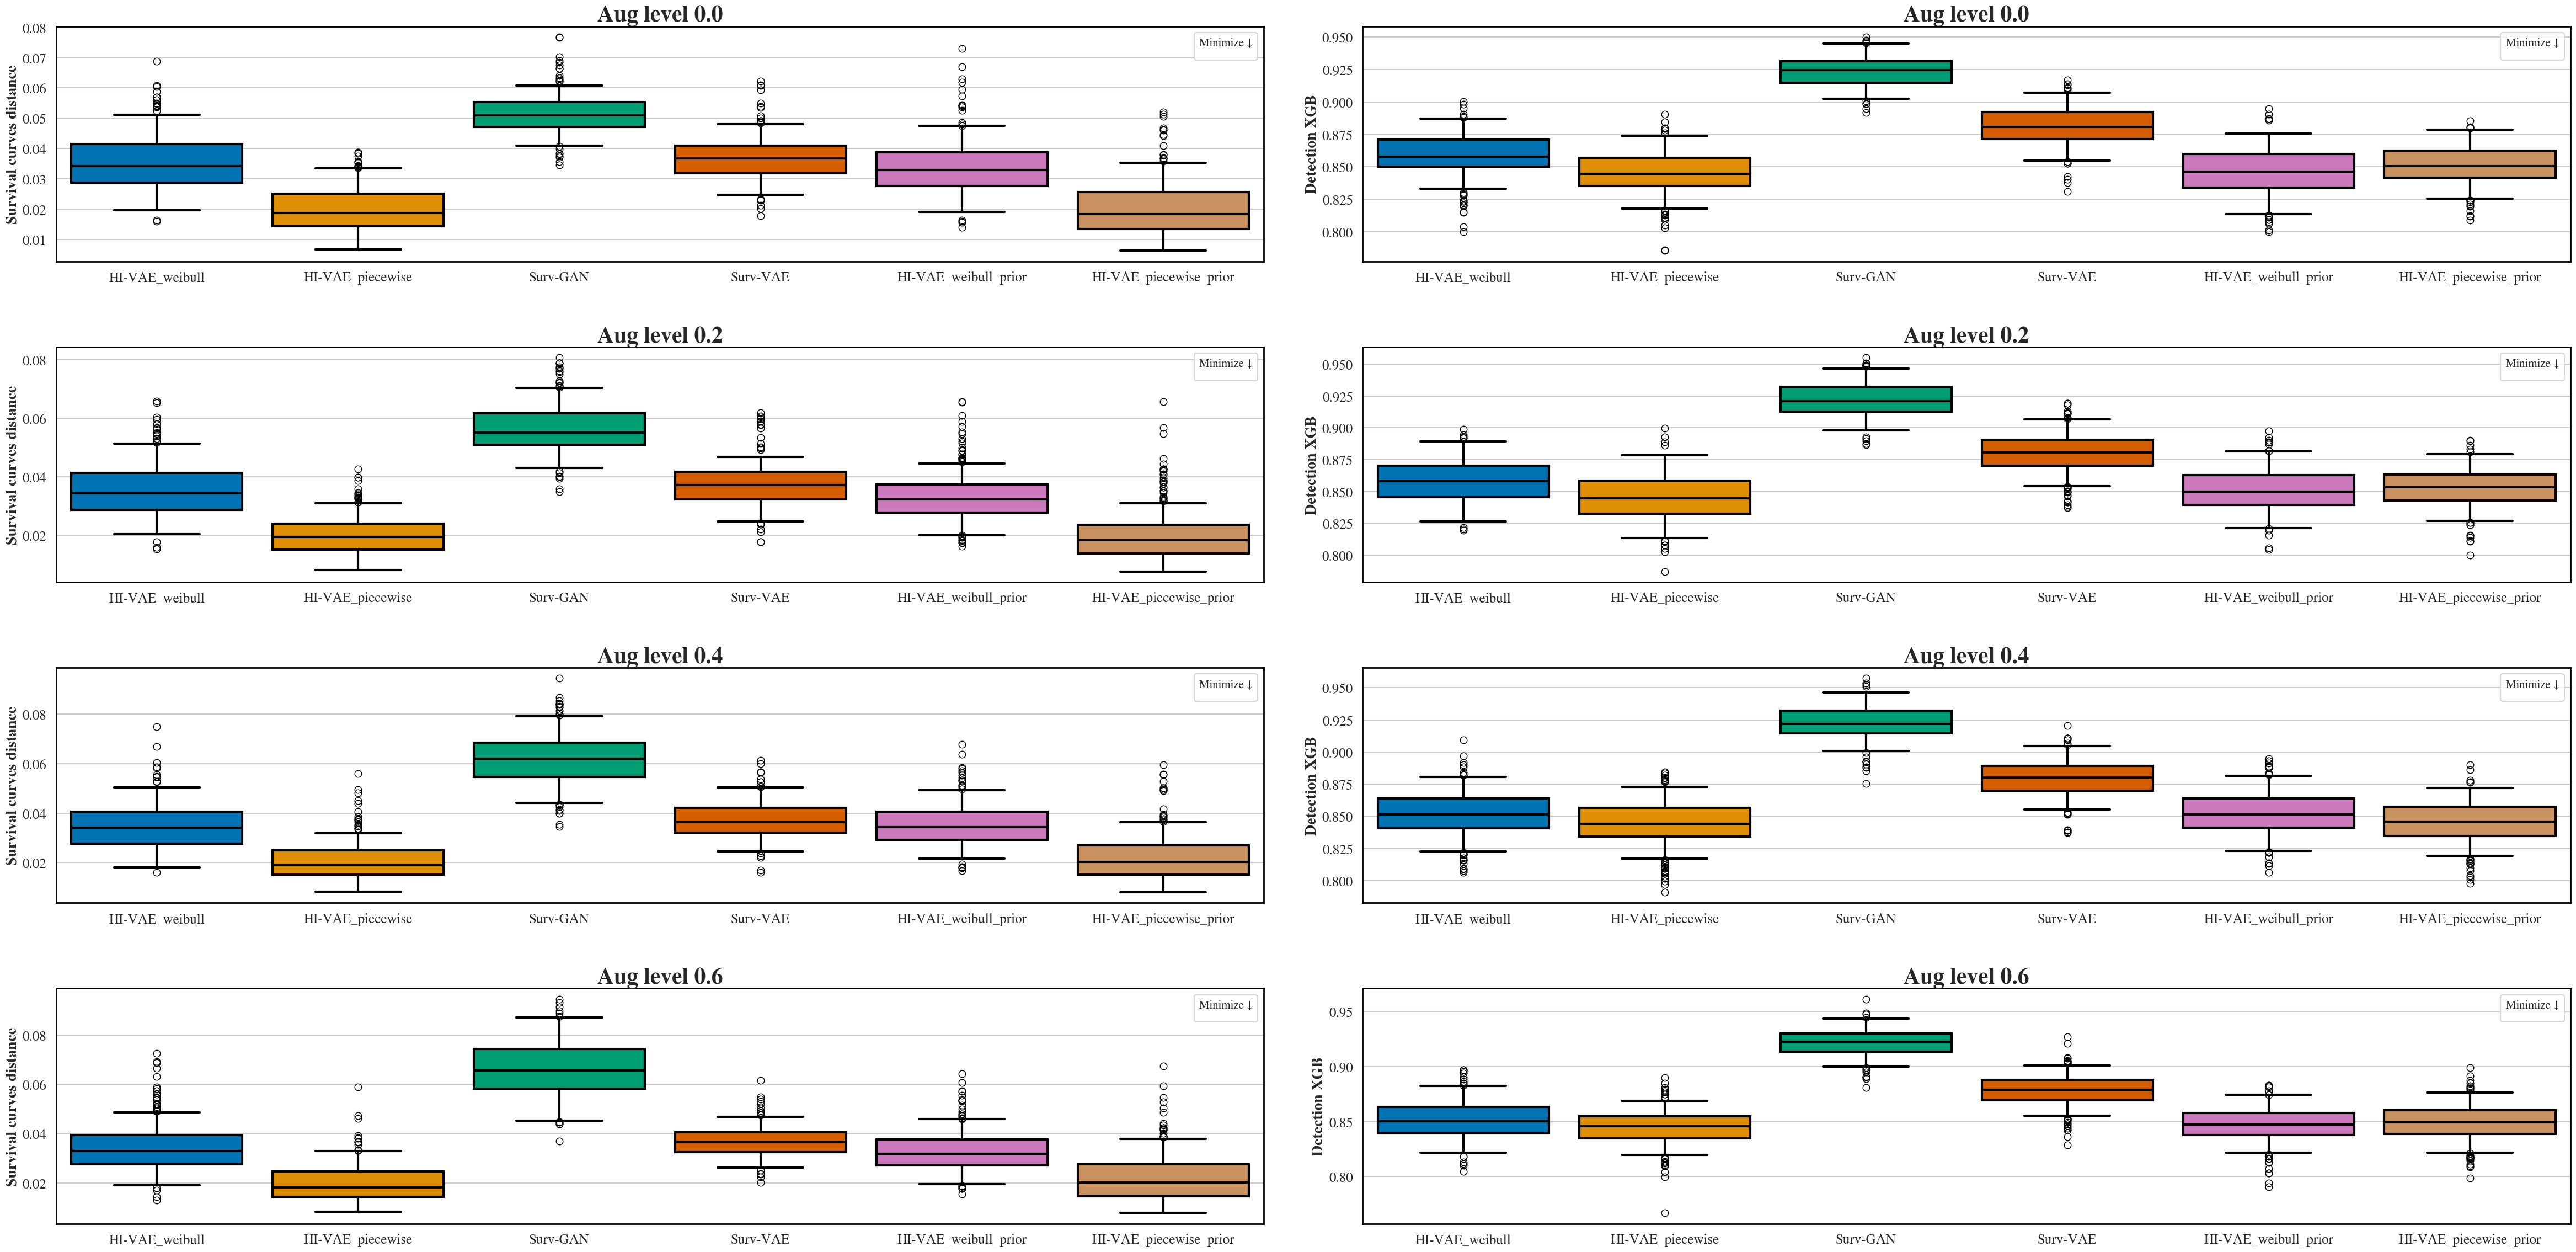

In [14]:
visualize("SAS_3", generators_sel, metrics=[['Survival curves distance', "min"], ['Detection XGB', "min"]])

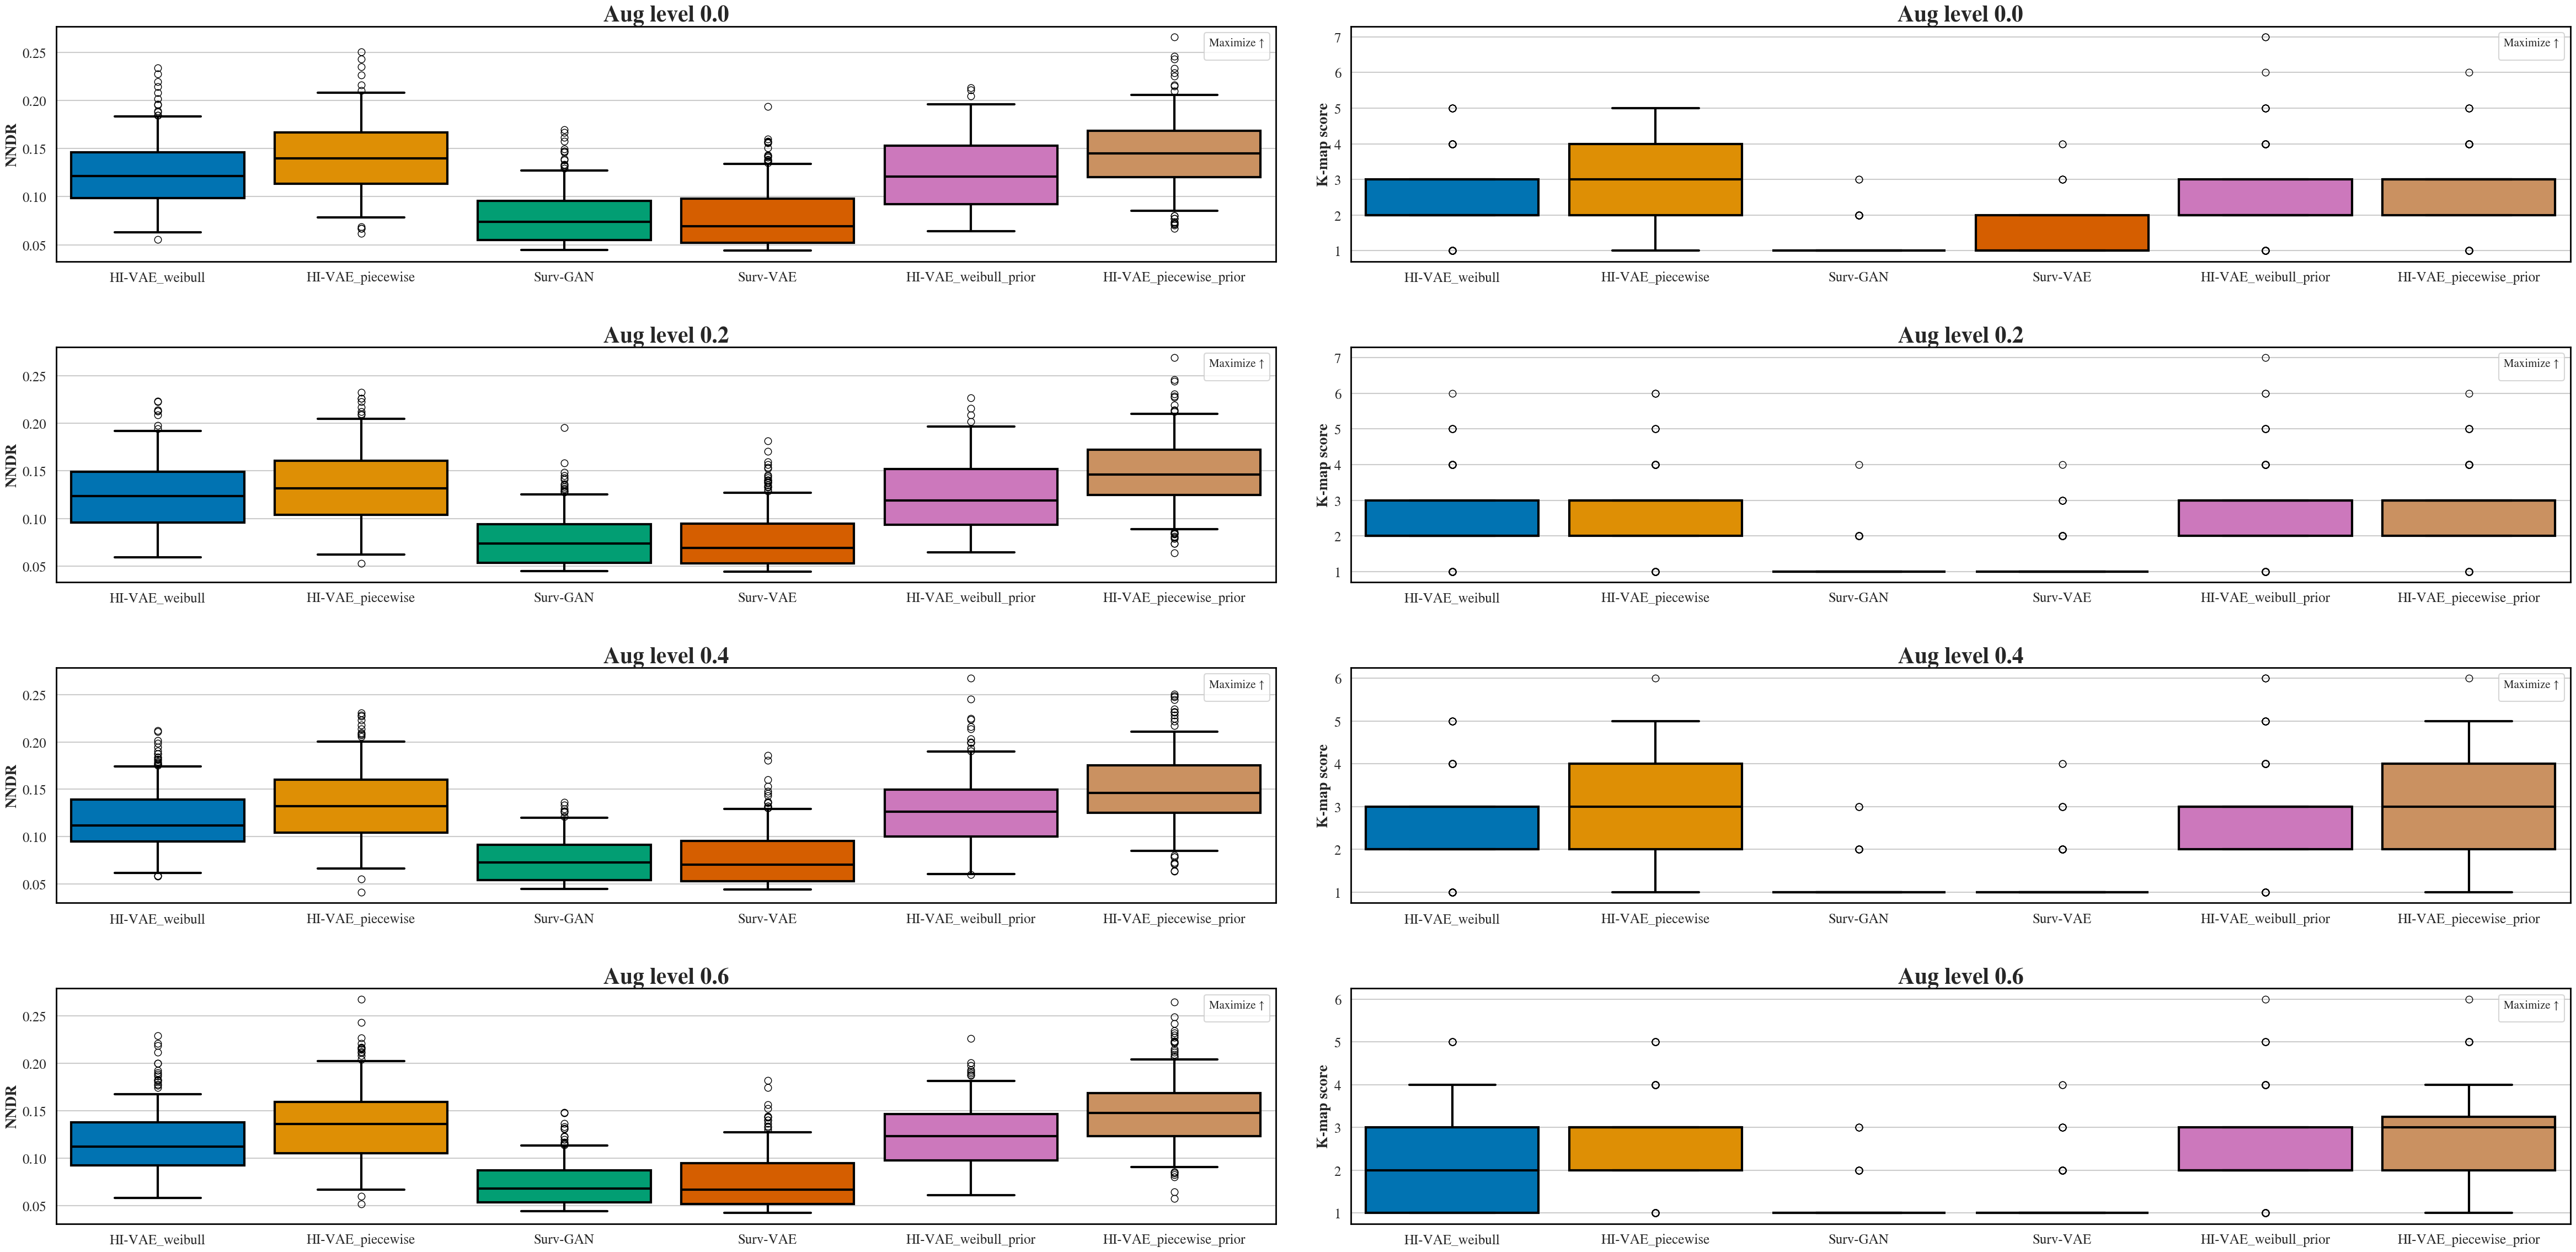

In [15]:
visualize("SAS_3", generators_sel, metrics=[['NNDR', "max"], ['K-map score', "max"]])